## Rainfall Prediction - Weather Forecasting

#### Problem Statement:
                                            

**Weather forecasting** is the application of science and technology to predict the **conditions of the atmosphere** for a given **location** and **time**. **Weather forecasts** are made by collecting **quantitative data** about the **current state of the atmosphere** at a given place and using meteorology to project how the atmosphere will change.**


**The Dataset contains about 10 years of daily weather observations of different locations in Australia.**

Aim:

Here, predict two things:

1. Design a predictive model with the use of machine learning algorithms to forecast **whether or not it will rain tomorrow.**
2. Design a predictive model with the use of machine learning algorithms to **predict how much rainfall could be there.**

In [1]:
#Loading the dataset
import pandas as pd
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('weatherAUS.csv')
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [2]:
data.shape

(8425, 23)

We have 8425 rows and 23 columns in the dataset.

In [3]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

We have string and float type of data in the dataset.

In [4]:
data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

These are the number of unique values in each columns of the dataset.

In [5]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Number of columns: 23

### Features in dataset(Independent Variable)

`Date`  - The date of observation

`Location`  -The common name of the location of the weather station

`MinTemp`  -The minimum temperature in degrees celsius

`MaxTemp` -The maximum temperature in degrees celsius

`Evaporation`  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

`Sunshine`  -The number of hours of bright sunshine in the day.

`WindGustDir`- The direction of the strongest wind gust in the 24 hours to midnight

`WindGustSpeed` -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

`WindDir9am` -Direction of the wind at 9am

`WindDir3pm` -Direction of the wind at 3pm

`WindSpeed9am` -Wind speed (km/hr) averaged over 10 minutes prior to 9am

`WindSpeed3pm` -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

`Humidity9am` -Humidity (percent) at 9am

`Humidity3pm` -Humidity (percent) at 3pm

`Pressure9am` -Atmospheric pressure (hpa) reduced to mean sea level at 9am

`Pressure3pm` -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

`Cloud9am` - Fraction of sky obscured by cloud at 9am. 

`Cloud3pm` -Fraction of sky obscured by cloud 

`Temp9am`-Temperature (degrees C) at 9am

`Temp3pm` -Temperature (degrees C) at 3pm

`RainToday` -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

### Target in dataset(Dependent Variable)

Since we have two approaches for this problem, we have two target variables in two way of appraoches. i.e:

**Considering this as a Regression problem:**  

`Rainfall`  -The amount of rainfall recorded for the day in mm 


**Considering this as a Classification Problem**:

`RainTomorrow` -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Only the columns ['Date', 'Location'] are having 8425 non null values. Rest of the columns are having null values in the data.

### Exploring the categorical variables

In [7]:
#User defined function to print the categories in each categorical variables.

for i in data.columns: 
    if data[i].dtypes =='object':
        print(i,'\n',data[i].unique())
        print('^'*50)

Date 
 ['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Location 
 ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
WindGustDir 
 ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
WindDir9am 
 ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
WindDir3pm 
 ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RainToday 
 ['No' 'Yes' nan]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RainTomorrow 
 ['No' 'Yes' nan]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


The column 'Date' is identified as string object. We can convert it to datetime formate and add new columns in the dataset with day, month and year of observation.

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format = "%Y-%m-%d")
data['Day_of_ob'] = data['Date'].dt.day
data['Month_of_ob'] = data['Date'].dt.month
data['Year_of_ob'] = data['Date'].dt.year

#We can drop the column 'Date' as we have created new separete columns with day, month, year of the observations.

data.drop('Date',axis = 1, inplace = True)

### Checking for Missing Values

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Day_of_ob           0
Month_of_ob         0
Year_of_ob          0
dtype: int64


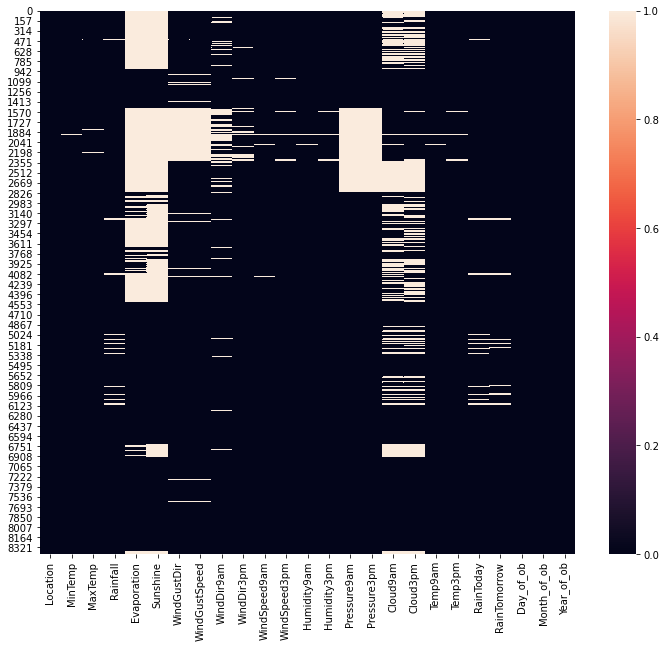

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[12,10])
sns.heatmap(data.isnull())
print(data.isnull().sum())

From the above observations, except the column ['Location', 'Day_of_ob','Month_of_ob'] rest of the columns are having missing values in data.

In [10]:
import numpy as np
for i in data.columns:
    if data[i].dtypes == 'O':
        data[i].fillna(data[i].mode()[0],inplace = True) #imputing mean value for missing values in numerical variables.
    elif data[i].dtypes == 'float64':
        data[i].fillna(np.mean(data[i]),inplace = True) #imputing mode value for missing values in categorical variables.

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day_of_ob        0
Month_of_ob      0
Year_of_ob       0
dtype: int64


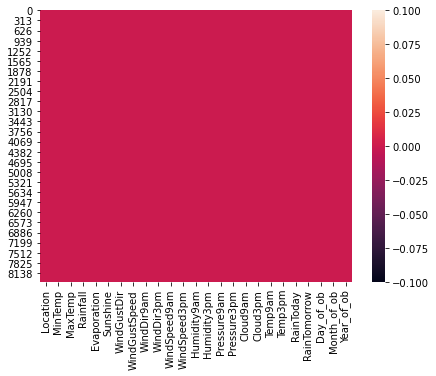

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[7,5])
sns.heatmap(data.isnull())
print(data.isnull().sum())

Now we don't have any missing values in the dataset.

### Data Visualization

#### Univariate Analysis.

In [12]:
#User defined function to plot the categorical variable using countplot
category_visualization = data.select_dtypes('O')
def count_plot(col):
    print(category_visualization[col].value_counts().sort_values(ascending = False))
    plt.figure(figsize = [12,4])
    sns.countplot(category_visualization[col])
    plt.xticks(rotation = 90)

In [13]:
data.select_dtypes('O').columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


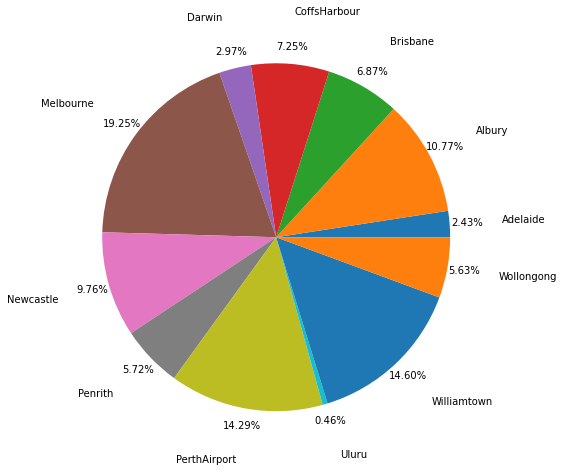

In [14]:
plt.figure(figsize = [9,8])
print(data['Location'].value_counts())
data.groupby('Location').size().plot.pie(pctdistance=1.1,labeldistance=1.3, autopct='%.2f%%',ylabel ='')
plt.show()

From the above observations, most of the data is provided for rainfall in Melbourne.

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


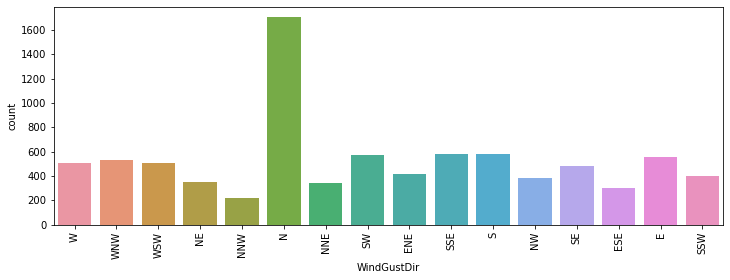

In [15]:
count_plot('WindGustDir')

From the above observations, most of the areas are getting the strongest windgust from north direction.

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


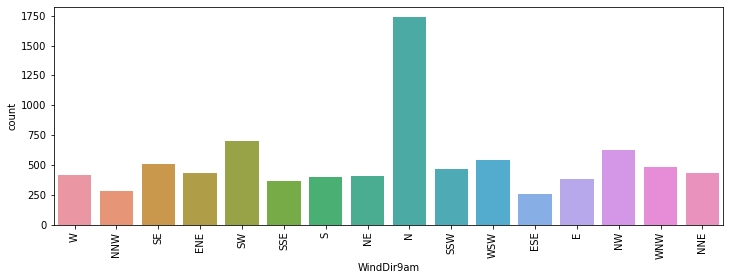

In [16]:
count_plot('WindDir9am')

From the above observations, most of the rainfall areas are getting the from North at 09.00 AM.

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
ESE     462
W       462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


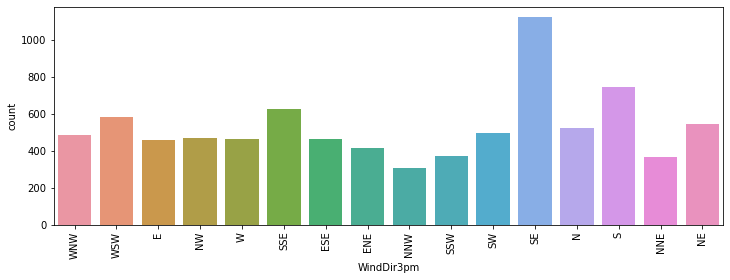

In [17]:
count_plot('WindDir3pm')

From the above observations, most of the rainfall areas are getting the from South East at 03.00 PM.

No     6435
Yes    1990
Name: RainToday, dtype: int64


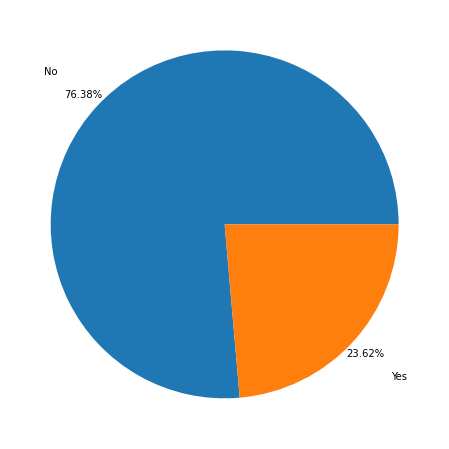

In [18]:
plt.figure(figsize = [9,8])
print(data['RainToday'].value_counts())
data.groupby('RainToday').size().plot.pie(pctdistance=1.1,labeldistance=1.3, autopct='%.2f%%',ylabel ='')
plt.show()

From the above observations, most of the areas are not having rainfall on the day when the observation was made.

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


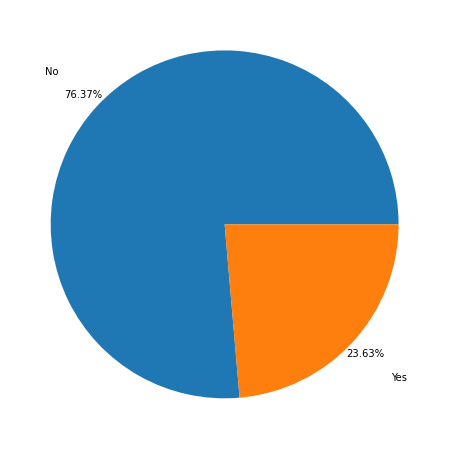

In [19]:
plt.figure(figsize = [9,8])
print(data['RainTomorrow'].value_counts())
data.groupby('RainTomorrow').size().plot.pie(pctdistance=1.1,labeldistance=1.3, autopct='%.2f%%',ylabel ='')
plt.show()

From the above obseravtions, most of the areas didn't have rainfall on the next day when the obseravtion was made.

In [20]:
#User defined function to plot the columns in histogram plot.
numerical_visualization = data.select_dtypes(['float64','int64'])

def histogramplot(col):
    plt.figure(figsize=[6,4])
    sns.histplot(x =col,data = numerical_visualization,bins =6,kde=True)
    print(np.histogram(numerical_visualization[col],bins=6))

In [21]:
data.select_dtypes('float64').columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

(array([ 243, 1354, 2636, 2563, 1469,  160], dtype=int64), array([-2.        ,  3.08333333,  8.16666667, 13.25      , 18.33333333,
       23.41666667, 28.5       ]))


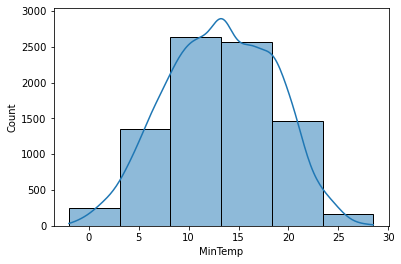

In [22]:
histogramplot('MinTemp')

From the above observations, most of the rainfall areas are having a minimum temperature between 8*-18* celsius.

(array([ 374, 2411, 3127, 1835,  598,   80], dtype=int64), array([ 8.2       , 14.41666667, 20.63333333, 26.85      , 33.06666667,
       39.28333333, 45.5       ]))


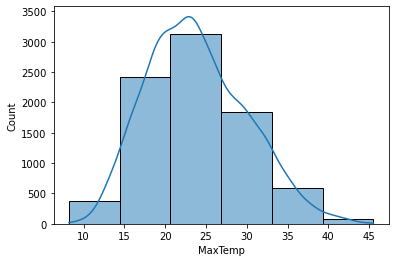

In [23]:
histogramplot('MaxTemp')

From the above observations, most of the rainfall areas are having a maximum temperature between 14.4* to 33* celsius.

(array([8393,   23,    5,    3,    0,    1], dtype=int64), array([  0.        ,  61.83333333, 123.66666667, 185.5       ,
       247.33333333, 309.16666667, 371.        ]))


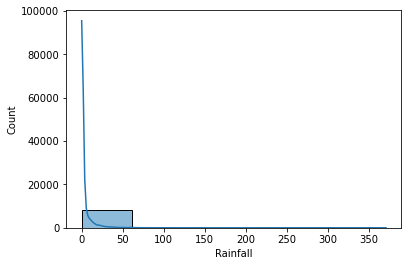

In [24]:
histogramplot('Rainfall')

From the above observations, most of the areas are having a rainfall recorded for a day is between 0 to 61mm.

(array([8388,   31,    4,    0,    0,    2], dtype=int64), array([  0.        ,  24.16666667,  48.33333333,  72.5       ,
        96.66666667, 120.83333333, 145.        ]))


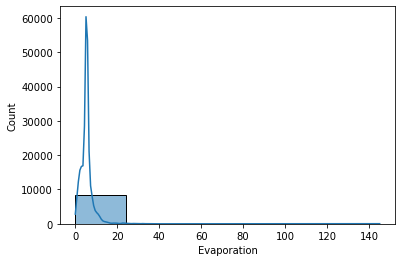

In [25]:
histogramplot('Evaporation')

From the above obseravtions, most of the areas are having Class-A evaporation in the 24 hours to 09.00 A.M is between 0 to 20mm.

(array([ 659,  426,  592, 4818, 1274,  656], dtype=int64), array([ 0.        ,  2.31666667,  4.63333333,  6.95      ,  9.26666667,
       11.58333333, 13.9       ]))


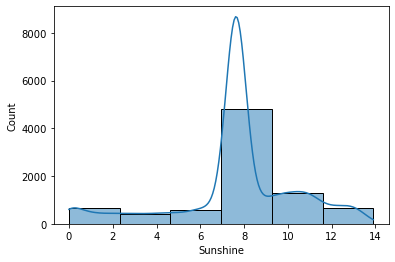

In [26]:
histogramplot('Sunshine')

From the above observations, most of the areas are getting 6.95 to 9.2 hours of sunlight a day.

(array([ 779, 4322, 2335,  772,  186,   31], dtype=int64), array([  7.        ,  23.66666667,  40.33333333,  57.        ,
        73.66666667,  90.33333333, 107.        ]))


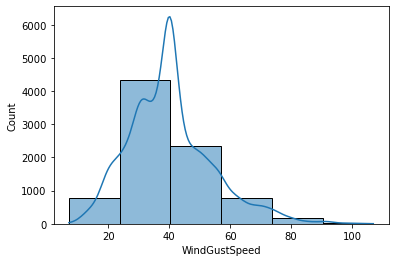

In [27]:
histogramplot('WindGustSpeed')

From the above observations, most of the area are having the strongest windgust with speed of 23 to 57km/h in the 24 hours to midnight.

(array([3510, 3196, 1295,  289,  115,   20], dtype=int64), array([ 0. , 10.5, 21. , 31.5, 42. , 52.5, 63. ]))


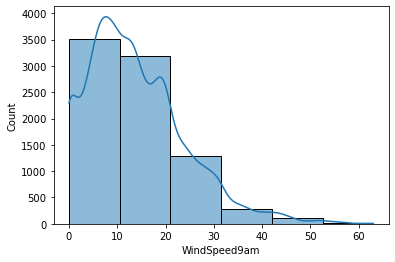

In [28]:
histogramplot('WindSpeed9am')

From the above observations, most of the areas are having the wind averaged over 10 minutes prior to 09.00 AM is having a speed of 0 to 21km/h.

(array([2972, 3765, 1560,  115,   12,    1], dtype=int64), array([ 0.        , 13.83333333, 27.66666667, 41.5       , 55.33333333,
       69.16666667, 83.        ]))


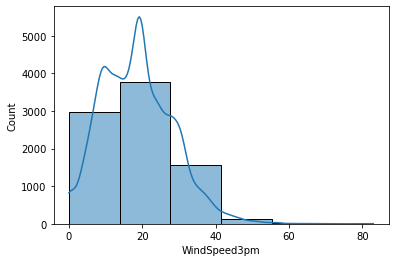

In [29]:
histogramplot('WindSpeed3pm')

From the above observations, most of the areas are having the wind averaged over 10 minutes prior to 03:00 PM is having a speed of 0 to 27km/h.

(array([  58,  380, 1381, 2652, 2443, 1511], dtype=int64), array([ 10.,  25.,  40.,  55.,  70.,  85., 100.]))


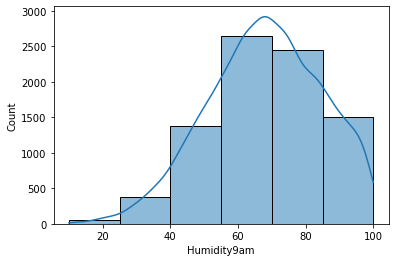

In [30]:
histogramplot('Humidity9am')

From the above observations, most of the rainfall areas are having humidity between 55 to 85% at 09.00 AM.

(array([ 444, 1378, 2738, 2285, 1159,  421], dtype=int64), array([ 6. , 21.5, 37. , 52.5, 68. , 83.5, 99. ]))


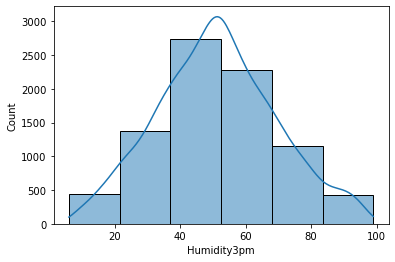

In [31]:
histogramplot('Humidity3pm')

From the above observations, most of the areas are having humidity between 37 to 68% at 03:00 PM.

(array([  19,  297, 1932, 4488, 1494,  195], dtype=int64), array([ 989.8,  998. , 1006.2, 1014.4, 1022.6, 1030.8, 1039. ]))


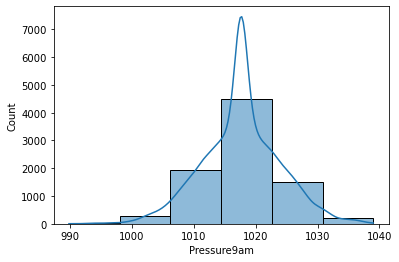

In [32]:
histogramplot('Pressure9am')

From the above observations, most of the areas are having an atmospheric pressure to mean sea level at 09.00 AM is between 1014 to 1022 hpa.

(array([   5,   84, 1386, 4633, 2051,  266], dtype=int64), array([ 982.9 ,  991.75, 1000.6 , 1009.45, 1018.3 , 1027.15, 1036.  ]))


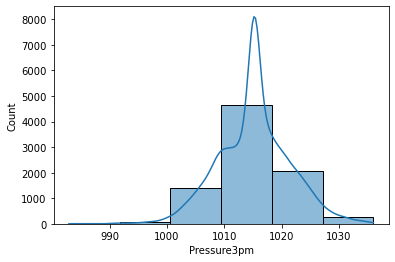

In [33]:
histogramplot('Pressure3pm')

From the above observations, most of the areas are having an atmospheric pressure to mean sea level at 03:00 PM is between 1009 to 1018 hpa.

(array([1592,  357,  384, 3108,  551, 2433], dtype=int64), array([0.        , 1.33333333, 2.66666667, 4.        , 5.33333333,
       6.66666667, 8.        ]))


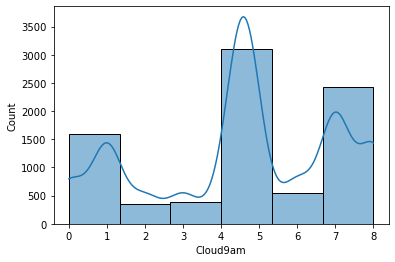

In [34]:
histogramplot('Cloud9am')

From the above observations, most of the areas are having sky obscured by clouds at 09.00 AM is between 4-5.33 and 6.7 to 8.

(array([1424,  508,  411, 3328,  597, 2157], dtype=int64), array([0.        , 1.33333333, 2.66666667, 4.        , 5.33333333,
       6.66666667, 8.        ]))


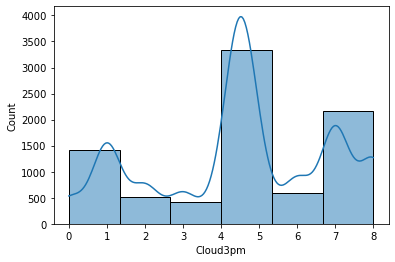

In [35]:
histogramplot('Cloud3pm')

From the above obseravtions, most of the areas are having sky obscured by clouds at 03:00 PM is between 4 to 5.33 and 6.7 to 8.

(array([ 366, 1998, 3360, 2288,  407,    6], dtype=int64), array([ 1.9 ,  8.15, 14.4 , 20.65, 26.9 , 33.15, 39.4 ]))


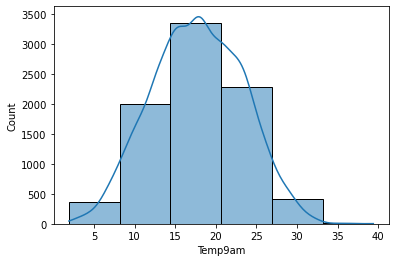

In [36]:
histogramplot('Temp9am')

From the above observations, most of the areas are having a temperature between 14 to 26.9* celsius at 09:00 AM.

(array([ 419, 2480, 3203, 1732,  517,   74], dtype=int64), array([ 7.3       , 13.43333333, 19.56666667, 25.7       , 31.83333333,
       37.96666667, 44.1       ]))


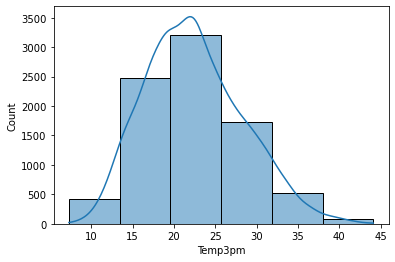

In [37]:
histogramplot('Temp3pm')

From the above observations, most of the areas are having a temperature between 13.4 to 27* celsius at 03:00 PM.

(array([1375, 1385, 1385, 1386, 1400, 1494], dtype=int64), array([ 1.,  6., 11., 16., 21., 26., 31.]))


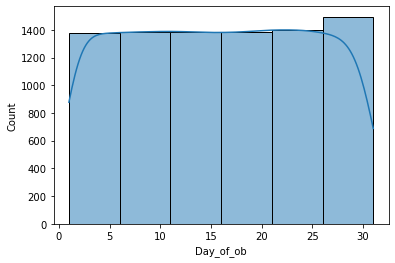

In [38]:
histogramplot('Day_of_ob')

From the above observations, most of the data of rainfall was recorded for the 26th to 31st day of a month.

(array([1373, 1361, 1619, 1414, 1264, 1394], dtype=int64), array([ 1.        ,  2.83333333,  4.66666667,  6.5       ,  8.33333333,
       10.16666667, 12.        ]))


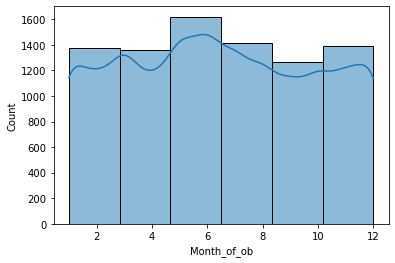

In [39]:
histogramplot('Month_of_ob')

Fron the above observations, most of the data about rainfaill was observed during the month of May and June

(array([1331, 1443, 2373,  543, 1612, 1123], dtype=int64), array([2008. , 2009.5, 2011. , 2012.5, 2014. , 2015.5, 2017. ]))


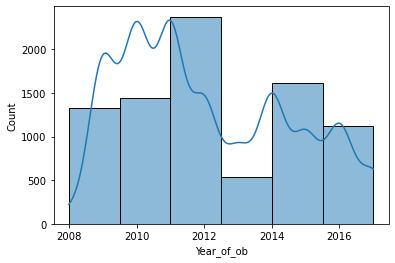

In [40]:
histogramplot('Year_of_ob')

From the above observations, most of the rainfall data was observed during the year 2011-2012.

#### Bivariate and Multivariate Analysis

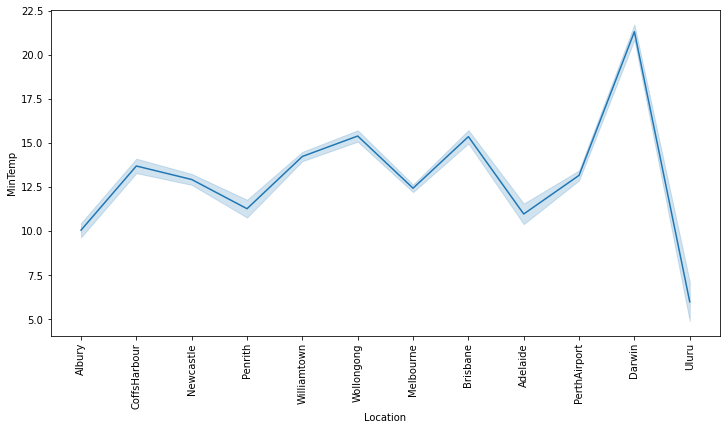

In [41]:
plt.figure(figsize =[12,6])
sns.lineplot('Location','MinTemp', data = data)
plt.xticks(rotation = 90)
plt.show()

From the above observations, the place Uluru is having the lowest recorded temperature in degree celsius.

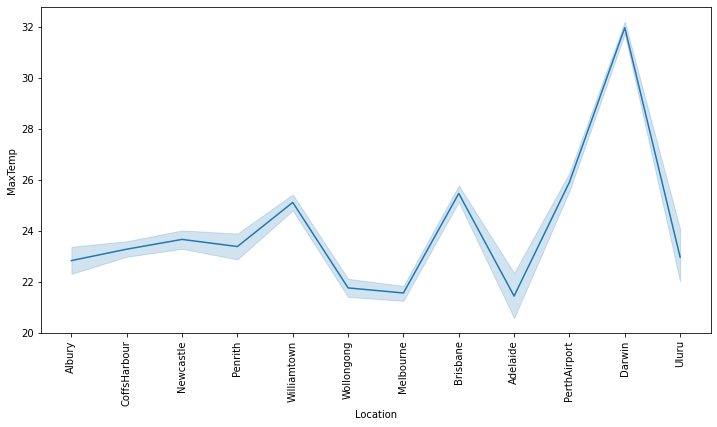

In [42]:
plt.figure(figsize =[12,6])
sns.lineplot('Location','MaxTemp', data = data)
plt.xticks(rotation = 90)
plt.show()

From the above observations, the place Darwin is having the highest recorded temperature in degree celsius.

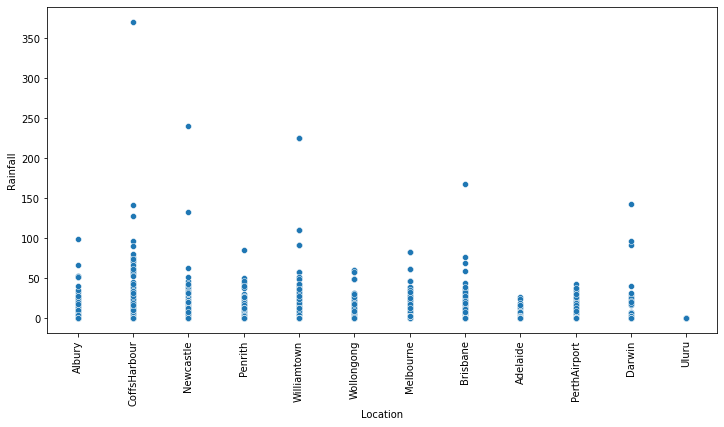

In [43]:
plt.figure(figsize =[12,6])
sns.scatterplot('Location','Rainfall', data = data)
plt.xticks(rotation = 90)
plt.show()

From the above observations, CoffsHarbour is getting highest amount of rainfall recorded for the day.

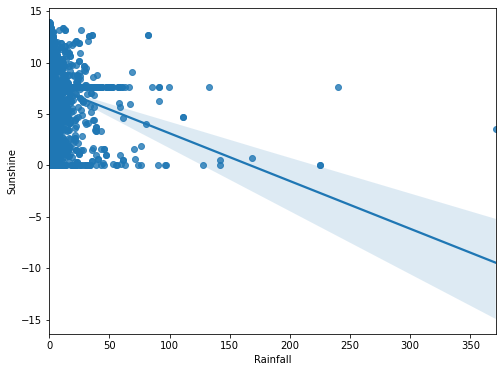

In [44]:
plt.figure(figsize =[8,6])
sns.regplot('Rainfall', 'Sunshine',data = data)
plt.show()

From the above observations, the amount of rainfall in an area is negatively correlated to the number of hours of bright sunshine in the day in that area.

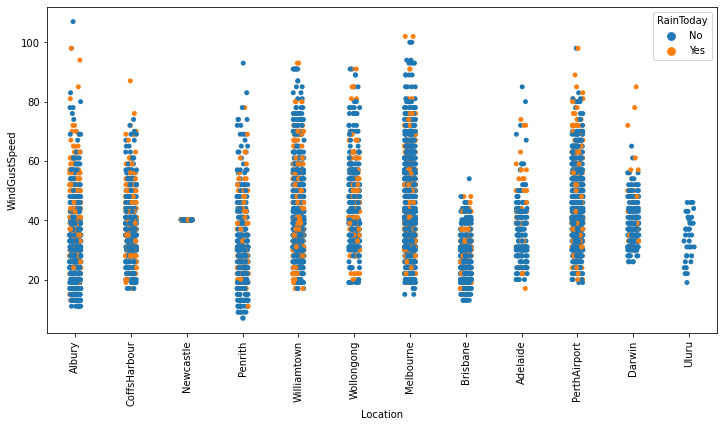

In [45]:
plt.figure(figsize =[12,6])
sns.stripplot('Location', 'WindGustSpeed',data = data, hue = 'RainToday')
plt.xticks(rotation = 90)
plt.show()

From the above observations, the area with higher windspeed is having rainfall on that day. 

<Figure size 864x432 with 0 Axes>

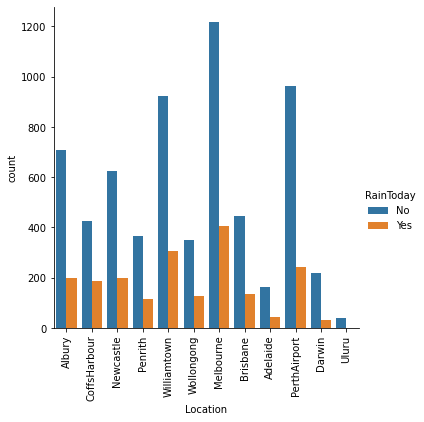

In [46]:
plt.figure(figsize =[12,6])
sns.factorplot('Location', kind = 'count',data = data, hue = 'RainToday')
plt.xticks(rotation = 90)
plt.show()

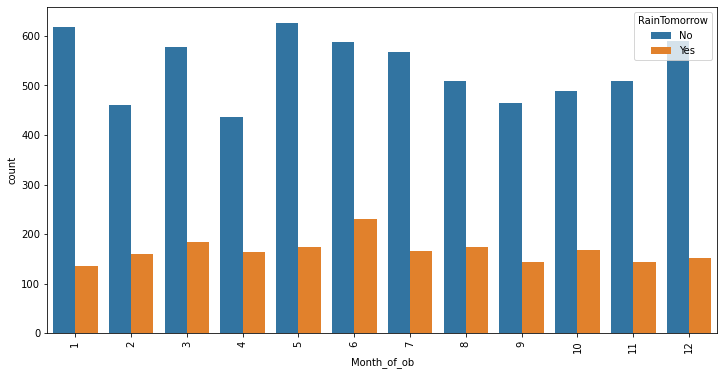

In [47]:
plt.figure(figsize =[12,6])
sns.countplot('Month_of_ob',data = data, hue = 'RainTomorrow')
plt.xticks(rotation = 90)
plt.show()

From the above observations, most of the rainfall for next day of observation occured during the month of June.

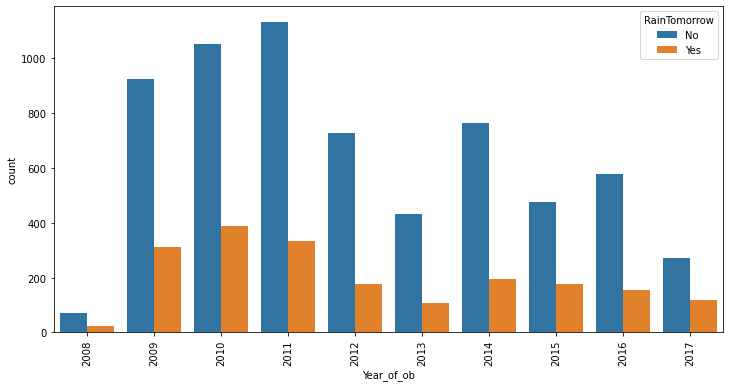

In [48]:
plt.figure(figsize =[12,6])
sns.countplot('Year_of_ob',data = data, hue = 'RainTomorrow')
plt.xticks(rotation = 90)
plt.show()

From the above observation, the highest rainfall occured during the year 2010.

### Statistical Summary

### Describe of the data

In [49]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day_of_ob,Month_of_ob,Year_of_ob
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.741958,6.442136,2012.102433
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


<AxesSubplot:>

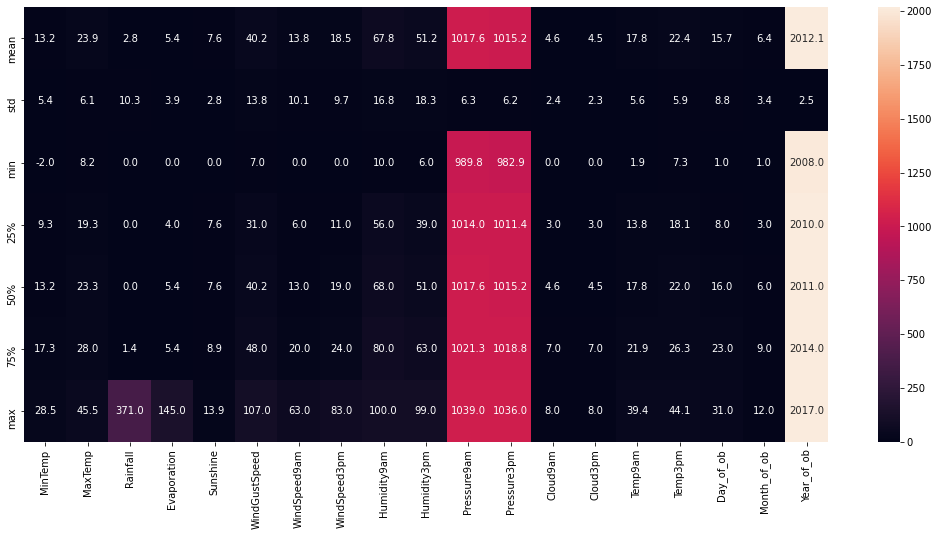

In [50]:
plt.figure(figsize=[18,8])
sns.heatmap(data.describe()[1:],annot=True,fmt='0.1f')

Observations:
    
1. For the columns ['MaxTemp', 'Rainfall', 'WindSpeed9am', 'Humidity3pm', 'Temp3pm', 'Month_of_ob', 'Year_of_ob'] are having high mean value than the median. That means the data is skewed.

2. The max value and 75% is having huge difference for the columns ['Rainfall', 'Evaporation']. That means possible outliers are present in the data of these columns.

### Encoding of Categorical Variables

In [51]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
onc = OrdinalEncoder()
lnc = LabelEncoder()

In [52]:
data.select_dtypes(object).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [53]:
data['RainTomorrow'] = lnc.fit_transform(data['RainTomorrow'].values.reshape(-1,1))    #Label encoding for target or label if we consider this as a classification problem.

In [54]:
for i in data.columns:
    if data[i].dtypes =='object':
        data[i] = onc.fit_transform(data[i].values.reshape(-1,1)).astype('int64')    #Ordinal Encoding for the features.

In [55]:
data.dtypes

Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int32
Day_of_ob          int64
Month_of_ob        int64
Year_of_ob         int64
dtype: object

Now we have encoded the categorical variables in the dataset.

### Correlation

In [56]:
Correlation = data.corr()
Correlation

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day_of_ob,Month_of_ob,Year_of_ob
Location,1.000000,0.116531,0.064268,0.007693,0.143519,0.057817,-0.035408,0.231396,-0.027103,-0.027736,0.221378,0.231801,0.005662,0.055790,-0.032261,-0.020574,0.038019,0.017561,0.118051,0.060570,0.003071,0.002824,-0.002019,-0.082407,0.486405
MinTemp,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.145316,0.230058,-0.041650,-0.147166,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.009446,-0.245854,0.044123
MaxTemp,0.064268,0.717522,1.000000,-0.087451,0.322405,0.378403,-0.224670,0.139998,-0.214119,-0.180622,0.013314,0.088172,-0.390976,-0.421879,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.224883,-0.152886,0.015608,-0.163253,0.119772
Rainfall,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.038812,0.086000,0.093821,0.038560,0.050631,0.024791,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021,-0.013760,-0.012244,0.006435
Evaporation,0.143519,0.254965,0.322405,0.023517,1.000000,0.226001,-0.078765,0.136371,-0.061677,-0.047952,0.104294,0.101126,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012,0.013597,0.004362,0.152708
Sunshine,0.057817,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.105918,-0.013778,-0.076560,-0.068553,-0.018069,0.030145,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731,0.004662,-0.006694,0.065374
WindGustDir,-0.035408,-0.145316,-0.224670,0.038812,-0.078765,-0.105918,1.000000,0.016591,0.403562,0.505799,0.025399,0.094623,0.036467,0.053567,-0.109704,-0.024997,0.123883,0.092979,-0.176318,-0.238856,0.125188,0.051832,0.015683,0.034823,-0.088340
WindGustSpeed,0.231396,0.230058,0.139998,0.086000,0.136371,-0.013778,0.016591,1.000000,-0.072058,0.071235,0.600198,0.634939,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127,-0.002876,0.051968,-0.042402
WindDir9am,-0.027103,-0.041650,-0.214119,0.093821,-0.061677,-0.076560,0.403562,-0.072058,1.000000,0.249527,0.054272,0.047116,0.025604,0.124556,-0.011024,0.073446,0.099582,0.062947,-0.103111,-0.221634,0.157324,0.032860,-0.015154,0.012544,-0.014498
WindDir3pm,-0.027736,-0.147166,-0.180622,0.038560,-0.047952,-0.068553,0.505799,0.071235,0.249527,1.000000,0.025973,0.068799,-0.010312,-0.012167,-0.136517,-0.043681,0.075453,0.053986,-0.165072,-0.194463,0.100125,0.008918,0.003089,0.029384,-0.005812


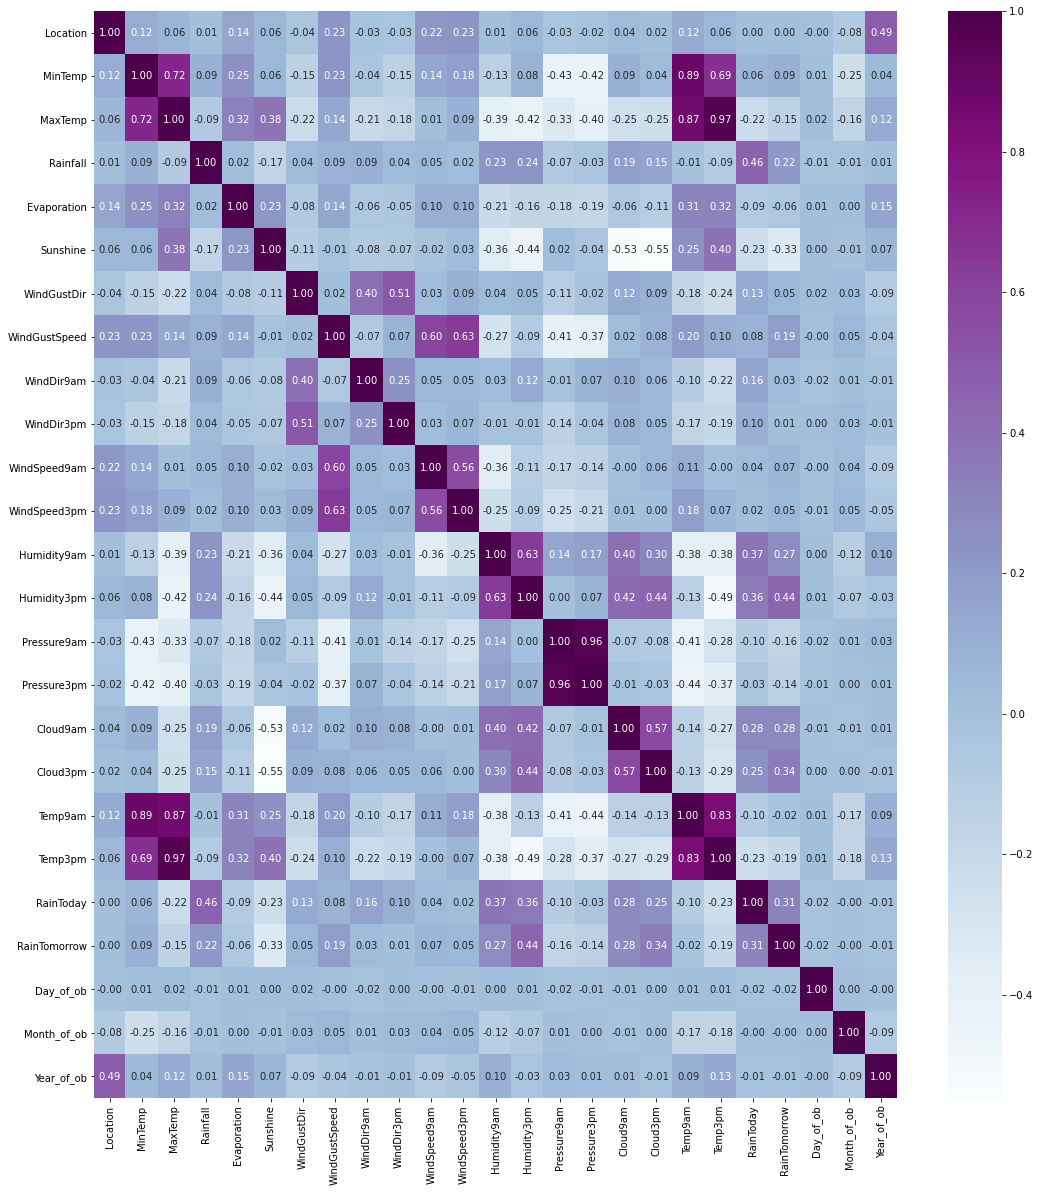

In [57]:
#Plotting the correlation of columns
plt.figure(figsize=[18,20])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='BuPu')
plt.show()

### Correlation with the Target column

#### Considering 'RainTomorrow' as Target Variable

Humidity3pm      0.444808
Cloud3pm         0.344369
RainToday        0.312929
Cloud9am         0.278943
Humidity9am      0.271222
Rainfall         0.220021
WindGustSpeed    0.190127
MinTemp          0.092942
WindSpeed9am     0.068285
WindSpeed3pm     0.053568
WindGustDir      0.051832
WindDir9am       0.032860
WindDir3pm       0.008918
Location         0.002824
Month_of_ob     -0.001243
Year_of_ob      -0.011066
Day_of_ob       -0.015461
Temp9am         -0.023211
Evaporation     -0.059012
Pressure3pm     -0.135242
MaxTemp         -0.152886
Pressure9am     -0.163985
Temp3pm         -0.193805
Sunshine        -0.327731
Name: RainTomorrow, dtype: float64


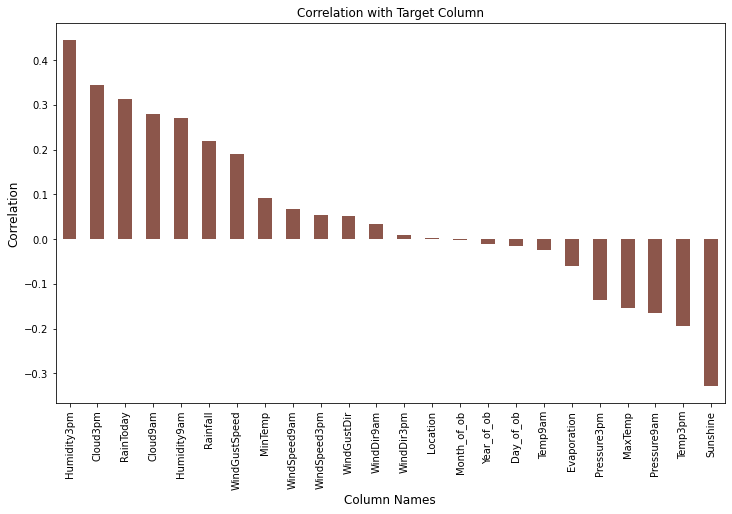

In [58]:
print(Correlation['RainTomorrow'].drop('RainTomorrow').sort_values(ascending = False))
plt.figure(figsize = [12,7])
Correlation['RainTomorrow'].sort_values(ascending= False).drop('RainTomorrow').plot(kind = 'bar', color ='tab:brown')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Observations:
    
1. The columns ['Month_of_ob', 'Year_of_ob', 'Day_of_ob', 'Temp9am', 'Evaporation', 'Pressure3pm', 'MaxTemp', 'Pressure9am', 'Temp3pm', 'Sunshine'] are having negative correlation to the target variable 'RainTomorrow'. Rest of the columns are having positive correlation to the target variable 'RainTomorrow'.

2. The column 'Humidity3pm' is having the highest positive correlation to the target variable 'RainTomorrow'. The column Sunshine is having the highest negative correlation to the target variable 'RainTomorrow'. 

3. The column 'Location' is having the least positive correlation to the target variable 'RainTomorrow', while the column 'Month_of_ob' is having the least negative correlation to the target variable 'RainTomorrow.

#### Considering 'Rainfall' as the Target Variable.

RainToday        0.461106
Humidity3pm      0.235444
Humidity9am      0.228800
RainTomorrow     0.220021
Cloud9am         0.185444
Cloud3pm         0.150760
WindDir9am       0.093821
MinTemp          0.087684
WindGustSpeed    0.086000
WindSpeed9am     0.050631
WindGustDir      0.038812
WindDir3pm       0.038560
WindSpeed3pm     0.024791
Evaporation      0.023517
Location         0.007693
Year_of_ob       0.006435
Temp9am         -0.007083
Month_of_ob     -0.012244
Day_of_ob       -0.013760
Pressure3pm     -0.033649
Pressure9am     -0.072668
MaxTemp         -0.087451
Temp3pm         -0.090687
Sunshine        -0.169432
Name: Rainfall, dtype: float64


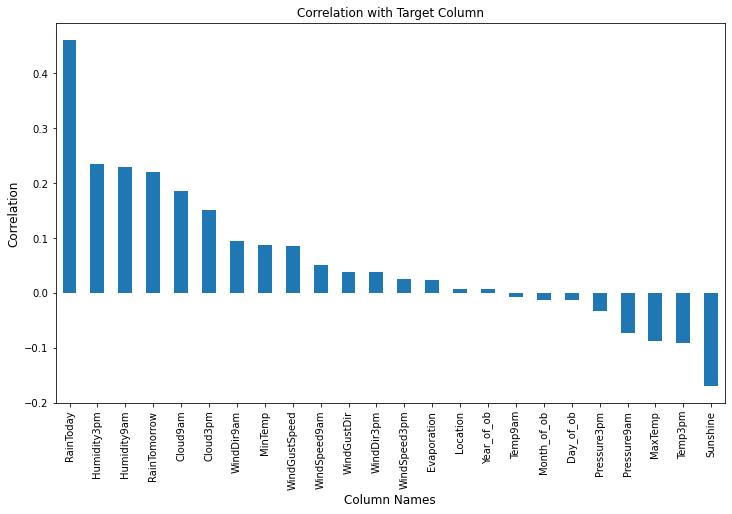

In [59]:
print(Correlation['Rainfall'].drop('Rainfall').sort_values(ascending = False))
plt.figure(figsize = [12,7])
Correlation['Rainfall'].sort_values(ascending= False).drop('Rainfall').plot(kind = 'bar', color ='tab:blue')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Observations:
    
1. The columns ['Temp9am', 'Month_of_ob', 'Day_of_ob', 'Pressure3pm', 'Pressure9am', 'MaxTemp', 'Temp3pm', 'Sunshine'] are having negative correlation to the target variable 'Rainfall'. Rest of the columns are having positive correlation to the target variable.

2. The column 'RainToday' is having highest correlation to the target variable 'Rainfall', while the column 'Sunshine' is having the highest negative correlation to the target variable 'Rainfall'.

3. The column 'Year_of_ob' is having the least positve correlation the target variabel 'Rainfall' and the column 'Temp9am' is having the least negative correlation to the target variable 'Rainfall'.

### Distribution of data in columns(Checking skewness of data)

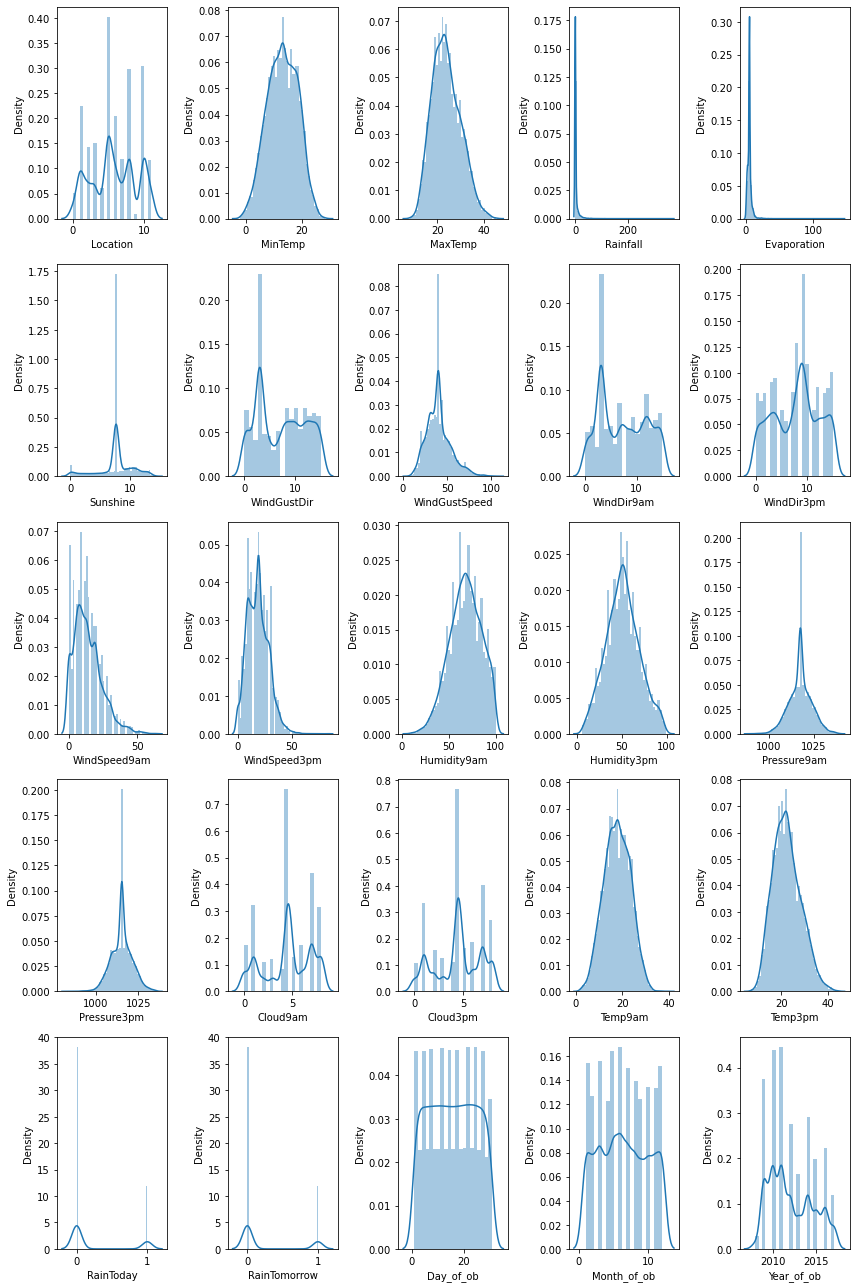

In [60]:
plt.figure(figsize = [12,18])
for i in range(0,len(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[data.columns.values[i]])
    plt.tight_layout()

From the above observations, none of the columns are having normally distributed data. Skewness is present in all the variable data.

### Skewness

In [61]:
Skewness = data.skew()
Skewness.sort_values(ascending = False)

Evaporation      14.023948
Rainfall         13.218403
RainToday         1.242362
RainTomorrow      1.241588
WindSpeed9am      0.960591
WindGustSpeed     0.757000
WindSpeed3pm      0.494217
Year_of_ob        0.418663
Temp3pm           0.397331
MaxTemp           0.380654
WindDir9am        0.172792
WindGustDir       0.119640
Humidity3pm       0.118281
Month_of_ob       0.039388
Day_of_ob         0.004260
Pressure3pm      -0.010214
Temp9am          -0.014748
Pressure9am      -0.024082
Location         -0.050456
MinTemp          -0.089989
WindDir3pm       -0.119847
Humidity9am      -0.256743
Cloud3pm         -0.276294
Cloud9am         -0.366503
Sunshine         -0.716525
dtype: float64

Observations:

1. The columns ['Evaporation', 'Rainfall', 'RainToday', 'RainTomorrow', 'WindSpeed9am','WindGustSpeed', 'Sunshine'] are having high skewness in the data distribution.

2. The columns ['RainToday', 'RainTomorrow'] are categorical in nature. So the skewness of these columns are irrelevant.

3. If we consider this as a regression problem, our target variable would be 'Rainfall'. So we can't consider the skewness of this column.

### Checking the presence of Outliers

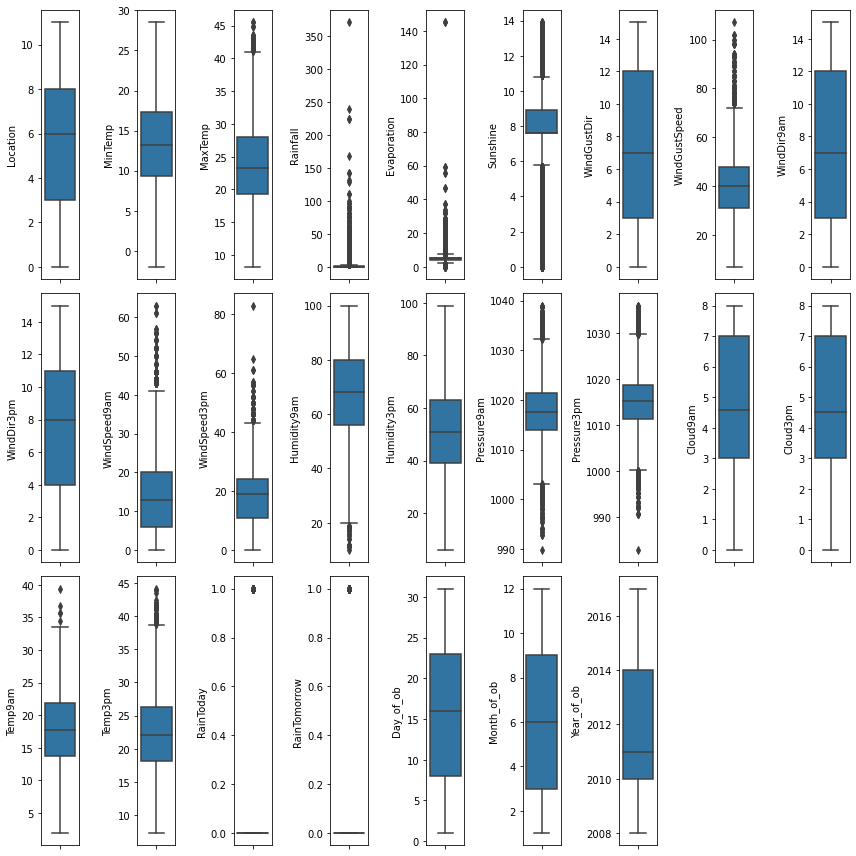

In [62]:
#Plotting the data of every columns with boxplot to check the outliers
plt.figure(figsize = [12,12])
for i in range(0,len(data.columns.values)):
    plt.subplot(3,9,i+1)
    sns.boxplot(y = data[data.columns.values[i]])
    plt.tight_layout()

Obbservations:
    
1. The columns [''MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'] are showing the presence of outliers in the data.
2. We can't consider the data in columns ['RainToday', 'RainTomorrow'] as outliers since these columns are categorical in nature.

### Data Cleaning

### Considering the column 'RainTomorrow' as Target variable and taking the classification approach to build the model

### Checking whether the data is balanced or not

In [181]:
x = data.drop('RainTomorrow',axis = 1)
y = data['RainTomorrow']
print(x.shape)
print(y.shape)

(8425, 24)
(8425,)


0    6434
1    1991
Name: RainTomorrow, dtype: int64


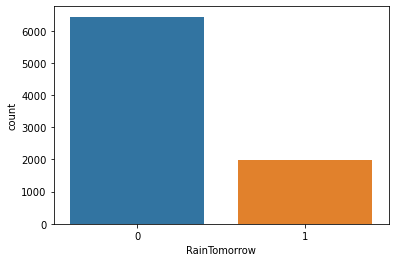

In [182]:
sns.countplot(y)
print(y.value_counts())

There is a huge imbalance is present in the dataframe. The date for no rainfall tomorrow is more in the dataset. We can balance the data with oversampling the data for rainfall tomorrow.

In [183]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
xtrainw, ytrainw = sm.fit_resample(x,y)
ytrainw

0        0
1        0
2        0
3        0
4        0
        ..
12863    1
12864    1
12865    1
12866    1
12867    1
Name: RainTomorrow, Length: 12868, dtype: int32

0    6434
1    6434
Name: RainTomorrow, dtype: int64


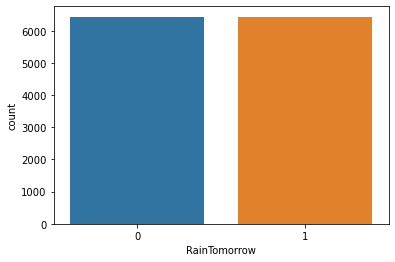

In [184]:
sns.countplot(ytrainw)
print(ytrainw.value_counts())

In [185]:
print(xtrainw.shape)
print(ytrainw.shape)

(12868, 24)
(12868,)


We have balanced our dataset by oversampling using SMOTE technique.

### Removing the Skewness

In [214]:
x = xtrainw.copy()
y = ytrainw.copy()
c = x.columns
print(x.shape)
print(y.shape)

(12868, 24)
(12868,)


#### Scaling the data before removing the skewness.

In [215]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = c)

In [216]:
#We can set the skewness standard limit as +/-1.
x.skew().sort_values(ascending=False)[np.abs(x.skew())>1]

Evaporation    13.681496
Rainfall        9.981563
RainToday       1.003869
dtype: float64

These are the columns that are having skewness which is beyond the standard limit. But the column 'RainToday' is categorical in nature, so we are not considering the skewness of the data in this column.

In [63]:
from sklearn.preprocessing import power_transform
#user defined function for removing skewness for columns which are beyond standard range
def rskew(col):
    x[col]=power_transform((x[col].values.reshape(-1,1)))

In [218]:
rskew('Evaporation')
rskew('Rainfall')

In [219]:
x.skew().sort_values(ascending = False)

RainToday        1.003869
Rainfall         0.960584
WindSpeed9am     0.894475
WindGustSpeed    0.705387
Year_of_ob       0.467306
Temp3pm          0.459896
MaxTemp          0.438112
WindSpeed3pm     0.423174
WindDir9am       0.169054
WindGustDir      0.100690
Month_of_ob      0.072302
Day_of_ob        0.017652
Temp9am          0.017116
Location        -0.011579
Humidity3pm     -0.030013
Pressure3pm     -0.048237
Evaporation     -0.063766
Pressure9am     -0.069403
MinTemp         -0.121433
WindDir3pm      -0.128930
Humidity9am     -0.404791
Cloud3pm        -0.514475
Cloud9am        -0.565904
Sunshine        -0.633549
dtype: float64

We have removed the skewness of the numerical columns which were beyond the standard limlit.

### Removing the Outliers

#### Using ZScore method

In [221]:
from scipy.stats import zscore
df = x.drop('RainToday',axis = 1).copy()   #removing the categorical column from the dataset before removing outliers.
z = np.abs(zscore(df))
z

array([[1.54286406, 0.02379102, 0.06370982, ..., 1.69337738, 1.72823339,
        1.65057189],
       [1.54286406, 1.17514572, 0.30707407, ..., 1.57695774, 1.72823339,
        1.65057189],
       [1.54286406, 0.11973724, 0.40819694, ..., 1.4605381 , 1.72823339,
        1.65057189],
       ...,
       [1.71577342, 1.24211798, 0.03071751, ..., 1.33353322, 1.72823339,
        1.65057189],
       [0.73818218, 0.19145689, 0.26455783, ..., 1.11127919, 0.51184596,
        0.00408263],
       [0.23940907, 0.27798434, 0.41927781, ..., 0.99485955, 1.42413654,
        1.23690826]])

In [222]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new['RainToday'] = x['RainToday']
df_new['RainTomorrow'] = y.copy()
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day_of_ob,Month_of_ob,Year_of_ob,RainToday,RainTomorrow
0,-1.542864,-0.023791,-0.063710,-0.340918,0.278975,0.193937,1.267786,0.164435,1.289289,1.474091,0.578872,0.534759,0.020028,-1.784280,-1.502932,-1.245164,1.293240,-0.224227,-0.149155,0.010456,-1.693377,1.728233,-1.650572,-0.616998,0
1,-1.542864,-1.175146,0.307074,-0.746919,0.278975,0.193937,1.489192,0.164435,-0.290228,1.709052,-1.019479,0.330670,-1.610679,-1.628471,-1.037596,-1.131861,-0.183543,-0.224227,-0.093834,0.441488,-1.576958,1.728233,-1.650572,-0.616998,0
2,-1.542864,-0.119737,0.408197,-0.746919,0.278975,0.193937,1.710598,0.304617,1.289289,1.709052,0.478975,0.738847,-1.973058,-1.368789,-1.518978,-0.986186,-0.183543,-1.355184,0.606893,0.251834,-1.460538,1.728233,-1.650572,-0.616998,0
3,-1.542864,-0.829739,0.795835,-0.746919,0.278975,0.193937,-0.724870,-1.237386,0.386708,-1.815358,-0.320200,-0.995908,-1.550282,-2.095899,0.085629,-0.322554,-0.183543,-0.224227,0.072127,0.820796,-1.344118,1.728233,-1.650572,-0.616998,0
4,-1.542864,0.762968,1.520549,-0.101919,0.278975,0.193937,1.267786,-0.045839,-1.418455,-0.170633,-0.719788,0.126581,0.684390,-1.212980,-1.005504,-1.423212,0.863115,1.355663,0.016807,1.372517,-1.227699,1.728233,-1.650572,-0.616998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12863,-0.239409,-1.165935,-1.856057,-0.161757,-0.886117,-1.262580,1.267786,1.081225,-0.515874,1.004170,1.928147,1.008244,-0.545284,0.107590,-0.447529,-0.150549,0.587835,0.548433,-1.467998,-1.872061,-1.111279,-0.400445,-0.823245,-0.616998,1
12864,-0.239409,0.008988,0.358374,-0.746919,-0.240169,0.610381,0.160755,-0.938299,0.612353,0.064328,-0.837064,-0.383641,-0.418136,-0.537166,-0.677416,-0.803925,-0.489080,0.287273,-0.341110,0.283860,0.635015,-1.312735,-0.409581,-0.616998,1
12865,1.715773,1.242118,0.030718,-0.746919,0.278975,0.193937,0.824974,0.629349,-0.515874,-0.405594,1.213906,0.362968,0.762683,1.434204,-1.628004,-1.692927,-0.700070,0.307720,0.692140,-0.064836,1.333533,1.728233,-1.650572,-0.616998,1
12866,0.738182,-0.191457,-0.264558,-0.147918,-1.304399,-0.827036,-0.282057,1.355982,-0.967164,-0.405594,0.665418,1.817133,0.770948,0.042109,-0.218950,-0.463082,-0.764227,0.903855,-0.400606,-0.263419,-1.111279,0.511846,0.004083,-0.616998,1


In [223]:
df['RainToday'] = x['RainToday']
df['RainTomorrow'] = y.copy()
df.shape

(12868, 25)

In [224]:
df_new.shape

(12365, 25)

In [225]:
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

3.9089213552999693

We are losing 3.91% of data from the dataframe after removing outliers using zscore method.

#### Using IQR (Inter Quantile Range) method

In [226]:
# 1st quantile

Q1=x.quantile(0.25)

# 3rd quantile
Q3=x.quantile(0.75)

# IQR
df
IQR=Q3 - Q1
df_a = df.drop('RainToday', axis = 1)
df_1=df_a[~((df_a < (Q1 - 1.5 * IQR)) |(df_a > (Q3 + 1.5 * IQR))).any(axis=1)]

In [227]:
df_1['RainToday'] = x['RainToday']
df_1.shape

(7551, 25)

In [228]:
df.shape

(12868, 25)

In [229]:
data_loss = (df.shape[0]-df_1.shape[0])/df.shape[0]*100
data_loss

41.31955237799192

We are losing 41.32% of data after removing outliers using IQR method. So we will stick with the zscore outlier removal method as it is incurring the least data loss after removing outlires.

### Checking the Multicolinearity of variables in the dataframe

In [230]:
x = df_new.drop('RainTomorrow',axis = 1)
y = df_new['RainTomorrow']
print(x.shape)
print(y.shape)

(12365, 24)
(12365,)


In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif.sort_values(by ='VIF Factor', ascending = False))

In [234]:
calc_vif(x)

,Column Name,VIF Factor
19,Temp3pm,32.688345
2,MaxTemp,24.710577
18,Temp9am,19.262836
14,Pressure9am,18.994513
15,Pressure3pm,18.027267
1,MinTemp,9.634235
13,Humidity3pm,6.236176
12,Humidity9am,4.284373
3,Rainfall,4.130520
23,RainToday,3.578660


We can see that the columns ['Temp3pm', 'MaxTemp', 'Temp9am', 'Pressure9am', 'Pressure3pm', 'MinTemp', 'Humidity3pm' ] are having high variance of inflation. So we can drop the columns ['Temp3pm','Pressure9am','Temp9am','MaxTemp'].

In [253]:
x1 = x.drop(['Temp3pm','Pressure9am','Temp9am','MaxTemp'], axis = 1)
calc_vif(x1)

,Column Name,VIF Factor
2,Rainfall,4.079709
19,RainToday,3.567242
11,Humidity9am,2.630056
12,Humidity3pm,2.298765
6,WindGustSpeed,2.208595
9,WindSpeed9am,2.042370
10,WindSpeed3pm,2.002445
14,Cloud9am,1.943069
4,Sunshine,1.932578
15,Cloud3pm,1.911447


Now the variance of inflation for the variables is below 5 which means, there is no much multicolinearity present in the variables.

In [254]:
#Steps performed till now
#1. Loaded the data
#2. Checked shape(rows and columns), data types, count of unique values in each columns.
#3. Features(Independent) and target(dependent) in the dataset
#4. Explored non-null values and unique values in categorical variables.
#5. Converted the column 'Date' to datetime format and extracted day, month, year of obseravtions from the column
    #dropped columns ['Date'] as we have extracted and added new columns.
#6. Checked for missing values
#7. Imputed mean value for missing values in numerical columns and mode value for missing values in categorical variables
#8. Data visualization
    #Univariate analysis - Using histogramplot, countplot, pie chart
    #Bivariate and multivariate analysis -  lineplot, stripplot, countplot, scatterplot, regplot, factorplot
    #dropped column 'insured_zip' as we already have location information in the dataset.
#Statistical Summary
#9. Describe of the data
#10. Encoded the categorical data in variables.
    #Label encoding - for target variable 
    #Ordinal Encoding for categorical features.  
#11.Correlation
#12. Correlation with target variable
    #Considering the column 'RainTomorrow' as target variable
    #Considering the column 'Rainfall' as target variable
#13. Checked distribution of data in columns(Checking skewness of data)
#14. Checked skewness of data
#15. Checked presense of outliers
#Data Cleansing
#16. Checked and removed imbalance of data
#17. Scaled data using standardscaler
#18. Removed the Skewness of data
#19. Removed outliers using Zscore and IQR method in which the Zscore method found to be best since it was incurring less data 
    #loss after revmoing outliers.
#20. Checked and removed multicolinearity
    #dropped columns ['Temp3pm','Pressure9am','Temp9am','MaxTemp'] as these columns were showing high variance of inflation.

### EDA Completed

### Building the Model - Classification

#### Splitting the data into features and target

In [255]:
features = x1.copy()
target = y.copy()
print(features.shape)
print(target.shape)

(12365, 20)
(12365,)


In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [257]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
estimator = [('LR', LogisticRegression()),
             ('KNN',KNeighborsClassifier()),
             ('SVR', SVC(gamma='auto')),
             ('DTC',DecisionTreeClassifier()),
             ('RFC',RandomForestClassifier(n_estimators=100))]
vtc = VotingClassifier(estimators = estimator)
sgdc = SGDClassifier()
etc = ExtraTreesClassifier()
xgbc = XGBClassifier()

#### Finding the best random_state

In [258]:
#User defined function for finding the best random state
def best_ran(model):
    maxAcc = 0
    maxRs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = accuracy_score(target_test,pred_test)
        if acc>maxAcc:
            maxAcc = acc
            maxRs = i
    print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

In [260]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    print("Accuracy Score is ",accuracy_score(target_test,pred_test))
    print(confusion_matrix(target_test,pred_test))
    print(classification_report(target_test,pred_test))

#### LogisticRegression

In [261]:
best_ran(lr)

LogisticRegression()
At random state  81 the model is having accuracy score of  0.7998382531338455


In [262]:
mod_test(lr,81)

LogisticRegression()
Accuracy Score is  0.7998382531338455
[[995 234]
 [261 983]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1229
           1       0.81      0.79      0.80      1244

    accuracy                           0.80      2473
   macro avg       0.80      0.80      0.80      2473
weighted avg       0.80      0.80      0.80      2473



#### KNeighborsClassifier

In [263]:
best_ran(knn)

KNeighborsClassifier()
At random state  51 the model is having accuracy score of  0.8879902951880307


In [278]:
mod_test(knn,51)

KNeighborsClassifier()
Accuracy Score is  0.8879902951880307
[[ 987  229]
 [  48 1209]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1216
           1       0.84      0.96      0.90      1257

    accuracy                           0.89      2473
   macro avg       0.90      0.89      0.89      2473
weighted avg       0.90      0.89      0.89      2473



#### DecisionTreeClassifier

In [264]:
best_ran(dtc)

DecisionTreeClassifier()
At random state  74 the model is having accuracy score of  0.895673271330368


In [279]:
mod_test(dtc,74)

DecisionTreeClassifier()
Accuracy Score is  0.8928427011726647
[[1056  133]
 [ 132 1152]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1189
           1       0.90      0.90      0.90      1284

    accuracy                           0.89      2473
   macro avg       0.89      0.89      0.89      2473
weighted avg       0.89      0.89      0.89      2473



#### GaussianNB

In [265]:
best_ran(gnb)

GaussianNB()
At random state  81 the model is having accuracy score of  0.7614233724221593


In [280]:
mod_test(gnb,81)

GaussianNB()
Accuracy Score is  0.7614233724221593
[[945 284]
 [306 938]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1229
           1       0.77      0.75      0.76      1244

    accuracy                           0.76      2473
   macro avg       0.76      0.76      0.76      2473
weighted avg       0.76      0.76      0.76      2473



#### RandomForestClassifier

In [266]:
best_ran(rfc)

RandomForestClassifier()
At random state  22 the model is having accuracy score of  0.9466235341690254


In [281]:
mod_test(rfc,22)

RandomForestClassifier()
Accuracy Score is  0.9466235341690254
[[1169   64]
 [  68 1172]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1233
           1       0.95      0.95      0.95      1240

    accuracy                           0.95      2473
   macro avg       0.95      0.95      0.95      2473
weighted avg       0.95      0.95      0.95      2473



#### AdaBoostClassifier

In [267]:
best_ran(abc)

AdaBoostClassifier()
At random state  86 the model is having accuracy score of  0.8378487666801455


In [282]:
mod_test(abc,86)

AdaBoostClassifier()
Accuracy Score is  0.8378487666801455
[[1053  215]
 [ 186 1019]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1268
           1       0.83      0.85      0.84      1205

    accuracy                           0.84      2473
   macro avg       0.84      0.84      0.84      2473
weighted avg       0.84      0.84      0.84      2473



#### GradientBoostingClassifier

In [268]:
best_ran(gbc)

GradientBoostingClassifier()
At random state  22 the model is having accuracy score of  0.8847553578649414


In [283]:
mod_test(gbc,22)

GradientBoostingClassifier()
Accuracy Score is  0.8847553578649414
[[1098  135]
 [ 150 1090]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1233
           1       0.89      0.88      0.88      1240

    accuracy                           0.88      2473
   macro avg       0.88      0.88      0.88      2473
weighted avg       0.88      0.88      0.88      2473



#### VotingClassifier

In [269]:
best_ran(vtc)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVR', SVC(gamma='auto')),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())])
At random state  31 the model is having accuracy score of  0.9211484027496967


In [284]:
mod_test(vtc,31)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVR', SVC(gamma='auto')),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())])
Accuracy Score is  0.9223615042458553
[[1119  124]
 [  68 1162]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1243
           1       0.90      0.94      0.92      1230

    accuracy                           0.92      2473
   macro avg       0.92      0.92      0.92      2473
weighted avg       0.92      0.92      0.92      2473



#### SGDClassifier

In [270]:
best_ran(sgdc)

SGDClassifier()
At random state  17 the model is having accuracy score of  0.7917509098261222


In [285]:
mod_test(sgdc,17)

SGDClassifier()
Accuracy Score is  0.7751718560452892
[[944 320]
 [236 973]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1264
           1       0.75      0.80      0.78      1209

    accuracy                           0.78      2473
   macro avg       0.78      0.78      0.78      2473
weighted avg       0.78      0.78      0.78      2473



#### ExtraTreesClassifier

In [271]:
best_ran(etc)

ExtraTreesClassifier()
At random state  11 the model is having accuracy score of  0.9539021431459765


In [286]:
mod_test(etc,11)

ExtraTreesClassifier()
Accuracy Score is  0.9514759401536595
[[1161   77]
 [  43 1192]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1238
           1       0.94      0.97      0.95      1235

    accuracy                           0.95      2473
   macro avg       0.95      0.95      0.95      2473
weighted avg       0.95      0.95      0.95      2473



#### XGBClassifier

In [272]:
best_ran(xgbc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
At random state  22 the model is having accuracy score of  0.945410432672867


In [287]:
mod_test(xgbc,22)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy Score is  0.945410432672867
[[1175   58]
 [  77 1163]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1233
           1       0.95      0.94      0.95      1240

    accuracy                           0.95      2473
   macro avg       

#### SVC

In [273]:
#User defined function for finding the best random state
def best_ran_svc(model,ker):
    svc = SVC(kernel = ker,probability=True)
    maxAcc = 0
    maxRs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = accuracy_score(target_test,pred_test)
        if acc>maxAcc:
            maxAcc = acc
            maxRs = i
    print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

In [274]:
#User defined function for using different kernels for SVC model
def svca(ker,ran):
    svc = SVC(kernel = ker,probability=True)
    print(SVC(),ker)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    svc.fit(features_train,target_train)
    pred_svc = svc.predict(features_test)
    print(accuracy_score(target_test,pred_svc))
    print(confusion_matrix(target_test,pred_svc))
    print(classification_report(target_test,pred_svc))

##### 'rbf'

In [275]:
best_ran_svc(svc,'rbf')

SVC()
At random state  31 the model is having accuracy score of  0.8803073190456935


In [288]:
svca('rbf',31)

SVC() rbf
0.8803073190456935
[[1083  160]
 [ 136 1094]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1243
           1       0.87      0.89      0.88      1230

    accuracy                           0.88      2473
   macro avg       0.88      0.88      0.88      2473
weighted avg       0.88      0.88      0.88      2473



##### 'linear'

In [276]:
best_ran_svc(svc,'linear')

SVC()
At random state  31 the model is having accuracy score of  0.8803073190456935


In [289]:
svca('linear',31)

SVC() linear
0.7917509098261222
[[1006  237]
 [ 278  952]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1243
           1       0.80      0.77      0.79      1230

    accuracy                           0.79      2473
   macro avg       0.79      0.79      0.79      2473
weighted avg       0.79      0.79      0.79      2473



##### 'poly'

In [277]:
best_ran_svc(svc,'poly')

SVC()
At random state  31 the model is having accuracy score of  0.8803073190456935


In [291]:
svca('poly',31)

SVC() poly
0.8637282652648605
[[1053  190]
 [ 147 1083]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1243
           1       0.85      0.88      0.87      1230

    accuracy                           0.86      2473
   macro avg       0.86      0.86      0.86      2473
weighted avg       0.86      0.86      0.86      2473



After testing the data with all the algorithms, the ExtraTree classifier(etc) model is performing better and providing maximum accuracy score of 95.1%. 

Now let's cross validate the models to find the best performing model.

### Cross Validation

In [292]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the Accuracy Score  is ",accuracy_score(target_test,pred_test))

#### LogisticRegression

In [293]:
cross_val(lr,81)

LogisticRegression()
At cv fold 9  the cv score is  0.7465500227993985 and the Accuracy Score  is  0.7998382531338455


#### KNeighborsClassifier

In [294]:
cross_val(knn,51)

KNeighborsClassifier()
At cv fold 9  the cv score is  0.7761472467738351 and the Accuracy Score  is  0.8879902951880307


#### DecisionTreeClassifier

In [295]:
cross_val(dtc,74)

DecisionTreeClassifier()
At cv fold 9  the cv score is  0.8190896284351791 and the Accuracy Score  is  0.8851597250303276


#### GaussianNB

In [296]:
cross_val(gnb,81)

GaussianNB()
At cv fold 9  the cv score is  0.7213147814196739 and the Accuracy Score  is  0.7614233724221593


#### RandomForestClassifier

In [297]:
cross_val(rfc,22)

RandomForestClassifier()
At cv fold 9  the cv score is  0.8600130470751334 and the Accuracy Score  is  0.9482410028305701


#### AdaBoostClassifier

In [298]:
cross_val(abc,86)

AdaBoostClassifier()
At cv fold 8  the cv score is  0.7370991848679335 and the Accuracy Score  is  0.8378487666801455


#### GradientBoostingClassifier

In [299]:
cross_val(gbc,22)

GradientBoostingClassifier()
At cv fold 9  the cv score is  0.7430761035798296 and the Accuracy Score  is  0.8847553578649414


#### VotingClassifier

In [300]:
cross_val(vtc,31)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVR', SVC(gamma='auto')),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())])
At cv fold 9  the cv score is  0.838016309786284 and the Accuracy Score  is  0.9247877072381723


#### SGDClassifier

In [301]:
cross_val(sgdc,17)

SGDClassifier()
At cv fold 8  the cv score is  0.7474437634233035 and the Accuracy Score  is  0.7792155276991508


#### ExtraTreesClassifier

In [305]:
cross_val(etc,11)

ExtraTreesClassifier()
At cv fold 9  the cv score is  0.8632476639009365 and the Accuracy Score  is  0.9506672058228872


#### XGBClassifier

In [303]:
cross_val(xgbc,22)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
At cv fold 9  the cv score is  0.7792212488746073 and the Accuracy Score  is  0.945410432672867


#### SVC

In [304]:
cross_val(svc,31)

SVC()
At cv fold 9  the cv score is  0.7801905914285334 and the Accuracy Score  is  0.8803073190456935


### After testing and cross validating the models, the ExtraTree Classifier(etc) model is performing well and providing an accuracy score of 95.1% with a cross validation mean score of 86.3% for 9 cross validations.

In [311]:
etc = ExtraTreesClassifier()
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 11)
etc.fit(features_train, target_train)
pred_test_etc = etc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test_etc))
print(confusion_matrix(target_test,pred_test_etc))
print(classification_report(target_test,pred_test_etc))
cv_score = cross_val_score(etc,features, target, cv = 9)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

Accuracy Score is  0.9498584714921149
[[1158   80]
 [  44 1191]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1238
           1       0.94      0.96      0.95      1235

    accuracy                           0.95      2473
   macro avg       0.95      0.95      0.95      2473
weighted avg       0.95      0.95      0.95      2473

CV score is  0.8642177721282858


### Hyperparameter Tuning

In [315]:
etc.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [318]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [100,150,200],
             'criterion': ['gini', 'entropy', 'log_loss'],
             'min_samples_split': [1,2,3],
             'max_features':['sqrt','log2',None]}

grid = GridSearchCV(estimator = ExtraTreesClassifier(),param_grid=parameters, cv = 9)

In [319]:
grid.fit(features,target)

GridSearchCV(cv=9, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]})

In [321]:
grid.best_score_

0.8702827302123778

In [322]:
grid.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 150}

Accuracy Score is  0.9514759401536595
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1238
           1       0.94      0.97      0.95      1235

    accuracy                           0.95      2473
   macro avg       0.95      0.95      0.95      2473
weighted avg       0.95      0.95      0.95      2473

CV score is  0.8617915886415999


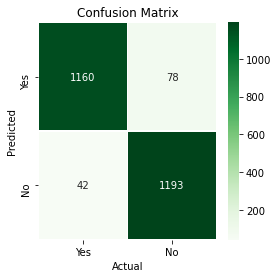

In [323]:
etc = ExtraTreesClassifier(n_estimators = 150,criterion = 'gini',min_samples_split = 3,max_features = 'log2')
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 11)
etc.fit(features_train, target_train)
pred_test_etc = etc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test_etc))
print(classification_report(target_test,pred_test_etc))
cv_score = cross_val_score(etc,features, target, cv = 9)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

cm = confusion_matrix(target_test, pred_test_etc)

x_labels = ["Yes","No"]
y_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(4,4))
sns.heatmap(cm, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, cmap="Greens", xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

### Our model has improved slightly better after hyper parameter tuning. Our final best accuracy score is 95.15% with a cross validation mean score of 86.18% for 9 cross validations.

### AUC ROC Curve

In [324]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [325]:
#User defined function for plotting AUC ROC curve for different models

def auc_roc(model):
    target_pred_prob = model.predict_proba(features_test)[:,1]
    fpr,tpr,thresholds = roc_curve(target_test,target_pred_prob)
    auc_score = roc_auc_score(target_test, model.predict(features_test))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title(model)
    plt.show()

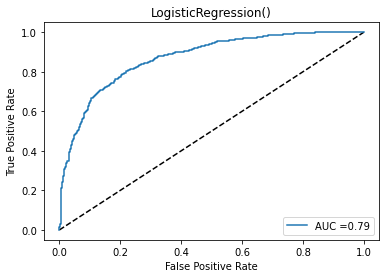

In [326]:
auc_roc(lr)

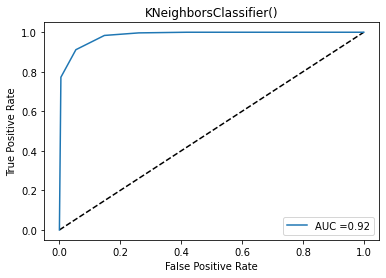

In [327]:
auc_roc(knn)

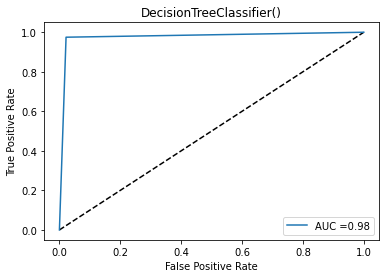

In [328]:
auc_roc(dtc)

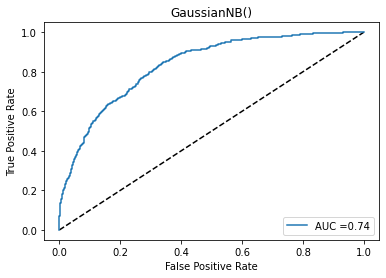

In [329]:
auc_roc(gnb)

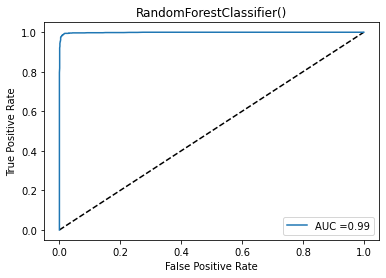

In [330]:
auc_roc(rfc)

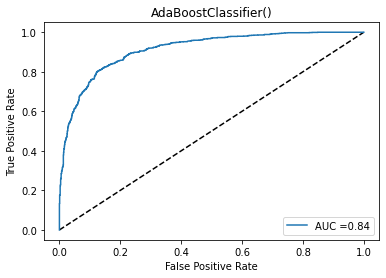

In [331]:
auc_roc(abc)

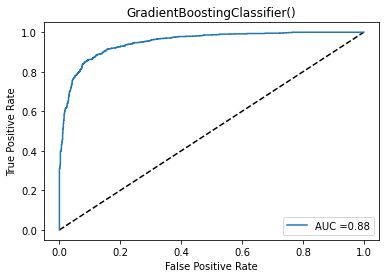

In [332]:
auc_roc(gbc)

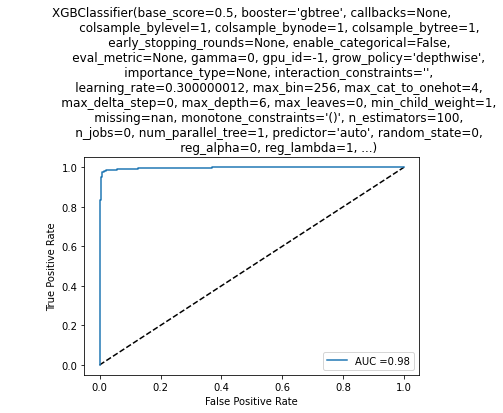

In [333]:
auc_roc(xgbc)

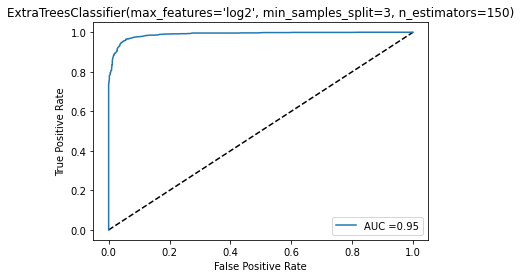

In [334]:
auc_roc(etc)

From the above observations, the RandomForest, DecisionTree, XGBoost Classifier models are providing the Maximum AUC score. But since the ExtraTree model is performing weel with all other tests, cross validations and tuning, we will consider this model as the best performing model. The etc model is providing a AUC score of 95%.

### After all the tests, cross validations and hyperparameter tuning, our etc is model is performing well and giving the best accuracy score of 95.15%.

### Saving the Best Model

In [335]:
import pickle

filename = 'Next day weather forecasting model .pkl'
pickle.dump(etc,open(filename,'wb'))

### Conclusion

In [337]:
original = np.array(target_test)
predicted = np.round(np.array(etc.predict(features_test)),0)
df_prediction = pd.DataFrame({'Whether it will Rain Tomorrow(Original)':original,'Whether it will Rain Tomorrow(Predicted)':predicted})
df_prediction.sample(10)

,Whether it will Rain Tomorrow(Original),Whether it will Rain Tomorrow(Predicted)
1591,0,0
981,0,0
1990,1,1
2114,0,0
1619,0,0
1048,1,1
660,1,1
2117,1,1
1254,1,1
1165,1,1


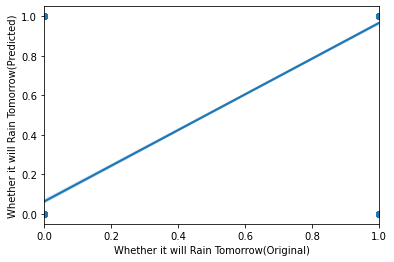

In [338]:
sns.regplot('Whether it will Rain Tomorrow(Original)','Whether it will Rain Tomorrow(Predicted)', data = df_prediction)
plt.show()

Our model is performing well with predictions without any errors. Now we can predict whether there be rainfall in an area with the following information:

`Rainfall`
`RainToday`
`Humidity9am`
`Humidity3pm`
`WindGustSpeed`
`WindSpeed9am`
`WindSpeed3pm`
`Cloud9am`
`Sunshine`
`Cloud3pm`
`MinTemp`
`Location`
`WindGustDir`
`Year_of_ob`
`Evaporation`
`WindDir3pm`
`Pressure3pm`
`WindDir9am`
`Month_of_ob`
`Day_of_ob`

### Machine learning model to forecast whether or not it will rain tomorrow (Classification) Created Successfully.

# 

### Considering the column 'Rainfall' as Target variable and taking the regression approach to build the model

### Removing Skewness

#### Splitting the data before removing skewness

In [64]:
x = data.drop('Rainfall',axis =1)
y = data['Rainfall']
c = x.columns
print(x.shape)
print(y.shape)

(8425, 24)
(8425,)


#### Scaling the data before removing the skewness.

In [65]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = c)

In [66]:
#We can set the skewness standard limit as +/-1.
x.skew().sort_values(ascending=False)[np.abs(x.skew())>1]

Evaporation     14.023948
RainToday        1.242362
RainTomorrow     1.241588
dtype: float64

We are not considering the columns ['RainToday', 'RainTomorrow'] for skewness removal as these columns are categorical in nature.

In [67]:
rskew('Evaporation')

In [68]:
x.skew().sort_values(ascending = False)

RainToday        1.242362
RainTomorrow     1.241588
WindSpeed9am     0.960591
WindGustSpeed    0.757000
WindSpeed3pm     0.494217
Year_of_ob       0.418663
Temp3pm          0.397331
MaxTemp          0.380654
WindDir9am       0.172792
WindGustDir      0.119640
Humidity3pm      0.118281
Month_of_ob      0.039388
Day_of_ob        0.004260
Pressure3pm     -0.010214
Temp9am         -0.014748
Pressure9am     -0.024082
Location        -0.050456
MinTemp         -0.089989
Evaporation     -0.116909
WindDir3pm      -0.119847
Humidity9am     -0.256743
Cloud3pm        -0.276294
Cloud9am        -0.366503
Sunshine        -0.716525
dtype: float64

We have successfully removed the skewness of the columns which were beyond the standard limit.

### Removing the Outliers

#### Using ZScore method

In [69]:
from scipy.stats import zscore
df = x.drop(['RainToday','RainTomorrow'],axis = 1).copy()   #removing the categorical column from the dataset before removing outliers.
z = np.abs(zscore(df))
z

array([[1.51577598e+00, 3.84250100e-02, 1.57008852e-01, ...,
        1.67773291e+00, 1.61669646e+00, 1.65889601e+00],
       [1.51577598e+00, 1.07698898e+00, 2.02812062e-01, ...,
        1.56392626e+00, 1.61669646e+00, 1.65889601e+00],
       [1.51577598e+00, 5.45261556e-02, 3.00945038e-01, ...,
        1.45011961e+00, 1.61669646e+00, 1.65889601e+00],
       ...,
       [1.01389522e+00, 1.44879364e+00, 4.97210991e-01, ...,
        8.26013396e-01, 1.28610663e-01, 1.98042320e+00],
       [1.01389522e+00, 1.00262804e+00, 5.13566487e-01, ...,
        9.39820046e-01, 1.28610663e-01, 1.98042320e+00],
       [1.01389522e+00, 3.17278507e-01, 3.62387452e-15, ...,
        1.05362670e+00, 1.28610663e-01, 1.98042320e+00]])

In [70]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new['RainToday'] = x['RainToday']
df_new['RainTomorrow'] = x['RainTomorrow']
df_new['Rainfall'] = y.copy()
df_new

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day_of_ob,Month_of_ob,Year_of_ob,RainToday,RainTomorrow,Rainfall
0,-1.515776,0.038425,-1.570089e-01,0.224878,1.257472e-15,1.229643,0.277710,1.249535,1.397222,0.607461,0.563297,0.189439,-1.597406,-1.584003,-1.308665,1.413459,3.862851e-16,-0.153712,-0.108138,-1.677733,1.616696,-1.658896,-0.556099,-0.556282,0.6
1,-1.515776,-1.076989,2.028121e-01,0.224878,1.257472e-15,1.442303,0.277710,-0.276260,1.622961,-0.972321,0.357200,-1.420268,-1.433568,-1.121880,-1.196072,0.000000,3.862851e-16,-0.100217,0.312348,-1.563926,1.616696,-1.658896,-0.556099,-0.556282,0.0
2,-1.515776,-0.054526,3.009450e-01,0.224878,1.257472e-15,1.654964,0.422897,1.249535,1.622961,0.508725,0.769394,-1.777981,-1.160505,-1.599939,-1.051309,0.000000,-1.088680e+00,0.577390,0.127334,-1.450120,1.616696,-1.658896,-0.556099,-0.556282,0.0
3,-1.515776,-0.742365,6.771214e-01,0.224878,1.257472e-15,-0.684299,-1.174166,0.377652,-1.763120,-0.281166,-0.982428,-1.360650,-1.925081,-0.006411,-0.391836,0.000000,3.862851e-16,0.060269,0.682376,-1.336313,1.616696,-1.658896,-0.556099,-0.556282,0.0
4,-1.515776,0.800625,1.380408e+00,0.224878,1.257472e-15,1.229643,0.059928,-1.366114,-0.182949,-0.676112,0.151104,0.845246,-0.996668,-1.090010,-1.485596,1.001777,1.520830e+00,0.006773,1.220599,-1.222506,1.616696,-1.658896,-0.556099,-0.556282,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.013895,-1.932140,-7.523137e-02,0.224878,1.257472e-15,-1.534940,-0.666009,0.377652,-1.537381,-0.083694,-0.776331,-1.002937,-1.488181,1.109058,0.814518,0.000000,3.862851e-16,-1.366273,-0.007221,0.598400,-0.128611,1.980423,-0.556099,-0.556282,0.0
8421,1.013895,-1.783418,2.355231e-01,0.224878,1.257472e-15,-0.258979,-1.319354,0.377652,-1.085904,-0.083694,-0.982428,-0.704843,-1.652018,0.933770,0.621501,0.000000,3.862851e-16,-1.223619,0.345987,0.712207,-0.128611,1.980423,-0.556099,-0.556282,0.0
8422,1.013895,-1.448794,4.972110e-01,0.224878,1.257472e-15,-0.896959,-0.230447,0.377652,1.397222,-0.478639,-0.982428,-0.883699,-1.488181,0.535388,0.251553,0.000000,3.862851e-16,-0.938310,0.615099,0.826013,-0.128611,1.980423,-0.556099,-0.556282,0.0
8423,1.013895,-1.002628,5.135665e-01,0.224878,1.257472e-15,0.379002,-0.883791,0.595623,-1.085904,-0.083694,-1.188525,-1.002937,-1.488181,0.280424,0.203299,-0.644950,-1.088680e+00,-0.474684,0.598279,0.939820,-0.128611,1.980423,-0.556099,-0.556282,0.0


In [71]:
df['RainToday'] = x['RainToday']
df['RainTomorrow'] = x['RainTomorrow']
df['Rainfall'] = y.copy()
df.shape

(8425, 25)

In [72]:
df_new.shape

(8119, 25)

In [73]:
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

3.632047477744807

By using the zscore method to remove outliers, we are losing only 3.63% of the data.

#### Using IQR (Inter Quantile Range) method

In [74]:
# 1st quantile

Q1=x.quantile(0.25)

# 3rd quantile
Q3=x.quantile(0.75)

# IQR
df
IQR=Q3 - Q1
df_a = df.drop(['RainToday','RainTomorrow','Rainfall'], axis = 1)
df_1=df_a[~((df_a < (Q1 - 1.5 * IQR)) |(df_a > (Q3 + 1.5 * IQR))).any(axis=1)]

In [75]:
df_1['RainToday'] = x['RainToday']
df_1['RainTomorrow'] = x['RainTomorrow']
df_1['Rainfall'] = y.copy()
df_1.shape

(4939, 25)

In [76]:
df.shape

(8425, 25)

In [77]:
data_loss = (df.shape[0]-df_1.shape[0])/df.shape[0]*100
data_loss

41.37685459940653

We are losing 41.38% of data after removing outliers using IQR method. So we are considering the Zscore outlier removal method as it is incurring least data loss after removing outliers.

### Checking the Multicolinearity of variables in the dataframe

In [78]:
x = df_new.drop('Rainfall',axis = 1)
y = df_new['Rainfall']
print(x.shape)
print(y.shape)

(8119, 24)
(8119,)


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif.sort_values(by ='VIF Factor', ascending = False))

In [80]:
calc_vif(x)

,Column Name,VIF Factor
18,Temp3pm,33.098406
2,MaxTemp,26.175679
13,Pressure9am,19.896980
14,Pressure3pm,19.052035
17,Temp9am,17.599495
1,MinTemp,8.774649
12,Humidity3pm,5.736041
11,Humidity9am,3.989971
6,WindGustSpeed,2.401771
9,WindSpeed9am,2.013123


The columns ['Temp3pm', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'MinTemp', 'Humidity3pm'] are having high variance inflation. So let's try removing the columns with high variance of inflation and try calculateing the VIF again.
We can drop the columns ['Temp3pm','Pressure9am', 'Temp9am','MaxTemp'].

In [81]:
x1 = x.drop(['Temp3pm','Pressure9am', 'Temp9am','MaxTemp'], axis =1).copy()
calc_vif(x1)

,Column Name,VIF Factor
10,Humidity9am,2.472938
11,Humidity3pm,2.347906
5,WindGustSpeed,2.325570
3,Sunshine,1.938017
8,WindSpeed9am,1.925101
9,WindSpeed3pm,1.912718
13,Cloud9am,1.875987
14,Cloud3pm,1.816003
1,MinTemp,1.672251
4,WindGustDir,1.595479


Now the VIF is under 5 for all the variables, that means there is least multicolinearity exist between variables in the dataset.

### EDA Completed

### Building the Model - Regression

#### Splitting the data into features and target

In [82]:
features = x1.copy()
target = y.copy()
print(features.shape)
print(target.shape)

(8119, 20)
(8119,)


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.linear_model import Lasso,Ridge,ElasticNet  #Reguralization technique

from sklearn.model_selection import train_test_split

In [84]:
lr = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
estimator = [('LR', LinearRegression()),
             ('KNN',KNeighborsRegressor()),
             ('SVR', SVR(gamma='auto')),
             ('DTR',DecisionTreeRegressor()),
             ('RFR',RandomForestRegressor(n_estimators=100))]
vtr = VotingRegressor(estimators=estimator)
sgd = SGDRegressor()
etr = ExtraTreesRegressor()
xgb = XGBRegressor()

#### Finding the best random_state

In [85]:
#User defined function for finding the best random state
def best_ran(model):
    maxacc = 0
    maxrs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = r2_score(target_test,pred_test)
        if acc>maxacc:
            maxacc = acc
            maxrs = i
    print("At random state ", maxrs, 'the model is having r2 score of ', maxacc)

In [86]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    acc = r2_score(target_test,pred_test)
    mse = mean_squared_error(target_test,pred_test)
    mae = mean_absolute_error(target_test,pred_test)
    print("R2 score is ", acc)
    print("_"*50)
    print("Mean Sqaured Error is ",mse)
    print("_"*50)
    print("Mean Absolute Error is ",mae)
    print("_"*50)

#### LinearRegression

In [422]:
best_ran(lr)

LinearRegression()
At random state  67 the model is having r2 score of  0.5384192818173458


In [478]:
mod_test(lr,67)
print("Coefficent is ",lr.coef_)
print("_"*50)
print("Intercept is ",lr.intercept_)
print("_"*50)

LinearRegression()
R2 score is  0.41374087801131754
__________________________________________________
Mean Sqaured Error is  27.89116236117176
__________________________________________________
Mean Absolute Error is  2.828611066559139
__________________________________________________
Coefficent is  [-0.39150195  0.62373     0.70125257 -0.61647469 -0.16868147  0.61183256
  0.34346316  0.02155744  0.5790341  -0.25533194  0.80240905  0.26691303
  0.5018506   0.01685418 -0.29468155 -0.07280618  0.03170903  0.21789585
  4.0686877   0.55871906]
__________________________________________________
Intercept is  2.843105974724648
__________________________________________________


#### KNeighborsRegressor

In [424]:
best_ran(knn)

KNeighborsRegressor()
At random state  90 the model is having r2 score of  0.5597892250727741


In [479]:
mod_test(knn,90)

KNeighborsRegressor()
R2 score is  0.2195272711240479
__________________________________________________
Mean Sqaured Error is  126.43584623514467
__________________________________________________
Mean Absolute Error is  2.533447725173107
__________________________________________________


#### SVR

In [376]:
best_ran(svr)

SVR()
At random state  36 the model is having r2 score of  0.3965834141027582


In [386]:
mod_test(svr,36)

SVR()
R2 score is  0.3965834141027582
__________________________________________________
Mean Sqaured Error is  18.527222289024497
__________________________________________________
Mean Absolute Error is  1.4152638445398102
__________________________________________________


#### DecisionTreeRegressor

In [377]:
best_ran(dtr)

DecisionTreeRegressor()
At random state  31 the model is having r2 score of  0.5614916575240085


In [490]:
mod_test(dtr,31)

DecisionTreeRegressor()
R2 score is  0.536145752196261
__________________________________________________
Mean Sqaured Error is  35.38947880848241
__________________________________________________
Mean Absolute Error is  1.6792418096301358
__________________________________________________


#### RandomForestRegressor

In [480]:
best_ran(rfr)

RandomForestRegressor()
At random state  98 the model is having r2 score of  0.715758739287722


In [483]:
mod_test(rfr,98)

RandomForestRegressor()
R2 score is  0.7149135899957884
__________________________________________________
Mean Sqaured Error is  25.93270169828446
__________________________________________________
Mean Absolute Error is  1.7102802116842364
__________________________________________________


#### AdaBoostRegressor

In [379]:
best_ran(abr)

AdaBoostRegressor()
At random state  73 the model is having r2 score of  0.10500704938451844


In [389]:
mod_test(abr,73)

AdaBoostRegressor()
R2 score is  -2.059855646000771
__________________________________________________
Mean Sqaured Error is  365.35214196118983
__________________________________________________
Mean Absolute Error is  17.148073002204885
__________________________________________________


#### GradientBoostingRegressor

In [426]:
best_ran(gbr)

GradientBoostingRegressor()
At random state  98 the model is having r2 score of  0.5870949761876971


In [390]:
mod_test(gbr,98)

GradientBoostingRegressor()
R2 score is  0.6394139220966872
__________________________________________________
Mean Sqaured Error is  32.16777000902577
__________________________________________________
Mean Absolute Error is  2.263518103787038
__________________________________________________


#### VotingRegressor

In [381]:
best_ran(vtr)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At random state  31 the model is having r2 score of  0.6033767440023803


In [391]:
mod_test(vtr,31)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
R2 score is  0.6051480639678937
__________________________________________________
Mean Sqaured Error is  30.124989237155457
__________________________________________________
Mean Absolute Error is  1.9133691886090372
__________________________________________________


#### SGDRegressor

In [382]:
best_ran(sgd)

SGDRegressor()
At random state  67 the model is having r2 score of  0.4197585983116807


In [392]:
mod_test(sgd,67)

SGDRegressor()
R2 score is  0.38191859141084283
__________________________________________________
Mean Sqaured Error is  29.40510138401687
__________________________________________________
Mean Absolute Error is  3.170618363491054
__________________________________________________


#### ExtraTreesRegressor

In [481]:
best_ran(etr)

ExtraTreesRegressor()
At random state  74 the model is having r2 score of  0.754535217174911


In [484]:
mod_test(etr,74)

ExtraTreesRegressor()
R2 score is  0.7501555625393889
__________________________________________________
Mean Sqaured Error is  22.2885432765443
__________________________________________________
Mean Absolute Error is  1.4811089349284268
__________________________________________________


#### XGBRegressor

In [482]:
best_ran(xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
At random state  98 the model is having r2 score of  0.7211752092340606


In [485]:
mod_test(xgb,98)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
R2 score is  0.7211752092340606
__________________________________________________
Mean Sqaured Error is  25.36311753658431
__________________________________________________
Mean Absolute Error is  1.7954188774499587
__________________________________________________


After testing the data with the regression algorithms, the ensemble methods are performing well and providing the best R2 Score. Out of that the ExtraTree regressor is providing the best R2 Score of 75.45%

Now let's check the cross validation for each model to find tbe best performing model.

### Cross Validation

In [87]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

#### LinearRegression

In [487]:
cross_val(lr,67)

LinearRegression()
At cv fold 8  the cv score is  0.24862711056814826 and the R2 score  is  0.41374087801131754


#### KNeighborsRegressor

In [491]:
cross_val(knn,90)

KNeighborsRegressor()
At cv fold 8  the cv score is  0.33554328884553636 and the R2 score  is  0.2195272711240479


#### SVR

In [492]:
cross_val(svr,36)

SVR()
At cv fold 9  the cv score is  0.22088689135452877 and the R2 score  is  0.3965834141027582


#### DecisionTreeRegressor

In [493]:
cross_val(dtr,31)

DecisionTreeRegressor()
At cv fold 6  the cv score is  0.18069180232989202 and the R2 score  is  0.2223157593315186


#### RandomForestRegressor

In [494]:
cross_val(rfr,98)

RandomForestRegressor()
At cv fold 8  the cv score is  0.4637529146974548 and the R2 score  is  0.7132600729416656


#### AdaBoostRegressor

In [495]:
cross_val(abr,73)

AdaBoostRegressor()
At cv fold 0  the cv score is  0 and the R2 score  is  -1.2295368873905903


#### GradientBoostingRegressor

In [496]:
cross_val(gbr,98)

GradientBoostingRegressor()
At cv fold 7  the cv score is  0.37232059796177225 and the R2 score  is  0.5890643335905263


#### VotingRegressor

In [497]:
cross_val(vtr,37)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At cv fold 8  the cv score is  0.4589701411893581 and the R2 score  is  0.39064355641340076


#### SGDRegressor

In [498]:
cross_val(sgd,61)

SGDRegressor()
At cv fold 5  the cv score is  0.23893161940609167 and the R2 score  is  0.19168412849402927


#### ExtraTreesRegressor

In [499]:
cross_val(etr,74)

ExtraTreesRegressor()
At cv fold 8  the cv score is  0.5052477036226275 and the R2 score  is  0.7430461703380131


#### XGBRegressor

In [500]:
cross_val(xgb,98)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
At cv fold 8  the cv score is  0.40256106544161674 and the R2 score  is  0.7211752092340606


#### After testing and cross validations, the ExtraTree regressor model(etr) is performing well and providing the maximum R2 Score of 74.3% with a cross validation mean score of 50.25% for 8 cross validations. So we can consider this model as the best performing model.

In [89]:
etr = ExtraTreesRegressor(n_estimators=400)
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 74)
etr.fit(features_train, target_train)
pred_test_etr = etr.predict(features_test)

cv_score = cross_val_score(etr,features, target, cv = 8)
cv_mean =cv_score.mean()
print("At cv fold",8," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test_etr))

print('R2 Score',r2_score(target_test,pred_test_etr))
print('Mean Squared Error',mean_squared_error(target_test,pred_test_etr))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test_etr))

At cv fold 8  the cv score is  0.5298288749849327 and the R2 score  is  0.7584123508647664
R2 Score 0.7584123508647664
Mean Squared Error 21.551957800453977
Mean Absolute Error 1.4676161756043324


### Regularization

In [502]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(0,10))}

#### Lasso(L1)

In [503]:
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [505]:
ls = Lasso(alpha = 0.1, random_state = 0)
ls.fit(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.2926379962065818

In [506]:
cross_val(ls,0)

Lasso(alpha=0.1, random_state=0)
At cv fold 8  the cv score is  0.25408224842595056 and the R2 score  is  0.1763431199783737


### Ridge(L2)

In [507]:
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [508]:
rd = Ridge(alpha = 1,random_state=0)
rd.fit(features_train,target_train)
pred_rd = rd.predict(features_test)

rds = r2_score(target_test,pred_rd)
rds

0.29524717772678477

In [509]:
cross_val(rd,0)

Ridge(alpha=1, random_state=0)
At cv fold 8  the cv score is  0.24863977208054477 and the R2 score  is  0.1789232766512393


### ElasticNet

In [510]:
en = ElasticNet()
clf = GridSearchCV(en,parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [511]:
en = ElasticNet(alpha = 0.1, random_state = 0)
en.fit(features_train,target_train)
pred_en = en.predict(features_test)

ens = r2_score(target_test,pred_en)
ens

0.29346663899445324

In [512]:
cross_val(en,0)

ElasticNet(alpha=0.1, random_state=0)
At cv fold 8  the cv score is  0.2540460543068733 and the R2 score  is  0.1761227841696028


The regularization techniques didn't provide any better results. So we can stick with the ExtraTree Regressor model as it is providing the maximum R2 Score.

### Hyperparameter Tuning

In [515]:
etr.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [516]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
parameters = {'n_estimators':[100,125,150,200],
             'criterion': ['squared_error','absolute_error'],
             'max_features': [None,'sqrt','log2'],
             'max_depth':[10,20,30,None]}

grid = HalvingGridSearchCV(estimator = ExtraTreesRegressor(),param_grid=parameters, cv = 8)

In [517]:
grid.fit(features,target)

HalvingGridSearchCV(cv=8, estimator=ExtraTreesRegressor(),
                    param_grid={'criterion': ['squared_error',
                                              'absolute_error'],
                                'max_depth': [10, 20, 30, None],
                                'max_features': [None, 'sqrt', 'log2'],
                                'n_estimators': [100, 125, 150, 200]})

In [518]:
grid.best_score_

0.5538698881895513

In [519]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [98]:
etr = ExtraTreesRegressor(n_estimators=100,max_depth=None,max_features='sqrt',criterion='absolute_error')
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 74)
etr.fit(features_train, target_train)
pred_test_etr = etr.predict(features_test)


print('R2 Score',r2_score(target_test,pred_test_etr))
print('Mean Squared Error',mean_squared_error(target_test,pred_test_etr))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test_etr))

R2 Score 0.7307938297592685
Mean Squared Error 24.015797336569687
Mean Absolute Error 1.5687382613726302


The hyper parameter didn't improve the score. So we can stick with our existing model.

In [95]:
etr = ExtraTreesRegressor(n_estimators=300)
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 74)
etr.fit(features_train, target_train)
pred_test_etr = etr.predict(features_test)


print('R2 Score',r2_score(target_test,pred_test_etr))
print('Mean Squared Error',mean_squared_error(target_test,pred_test_etr))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test_etr))

R2 Score 0.7523403685383351
Mean Squared Error 22.093637424113453
Mean Absolute Error 1.4732549598869762


In [96]:
cv_score = cross_val_score(etr,features, target, cv = 8)
cv_mean =cv_score.mean()
print("At cv fold",8," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test_etr))

At cv fold 8  the cv score is  0.5174113412601252 and the R2 score  is  0.7523403685383351


#### After all the tests, cross validations and tunings, the Extra Tree Regressor is performing well among all other algorithms.

### The ExtraTreeRegressor is providing a R2 Score of 75.2% with a cross validation mean score of 51.7% for 8 cross validations.

### Saving the best model

In [99]:
import pickle

filename = 'Rainfall prediction model.pkl'
pickle.dump(etr,open(filename,'wb'))

### Conclusion

In [102]:
original = np.array(target_test)
predicted = np.array(etr.predict(features_test))

prediction_test = pd.DataFrame({'Original Rainfall(mm)':original,'Predicted Rainfall(mm)':predicted})
prediction_test.sample(20)

,Original Rainfall(mm),Predicted Rainfall(mm)
1563,0.000000,0.000000
1099,0.000000,0.074059
1042,3.800000,2.660000
1379,3.600000,7.714000
484,0.800000,0.184237
3,0.000000,0.428118
377,0.000000,0.432237
848,0.400000,0.046000
675,39.200000,27.048000
72,0.000000,0.092059


Our model is performing well with predictions and providing almost accurate result with minimal or slight differences.

Now we can predict how much rainfall could be there with the following information.


`Humidity9am`
`Humidity3pm`
`WindGustSpeed`
`Sunshine`
`WindSpeed9am`
`WindSpeed3pm`
`Cloud9am`
`Cloud3pm`
`MinTemp`
`WindGustDir`
`Location`
`Evaporation`
`Year_of_ob`
`RainTomorrow`
`Pressure3pm`
`WindDir3pm`
`RainToday`
`WindDir9am`
`Month_of_ob`
`Day_of_ob`

### Predictive model to predict how much rainfall could be there, created successfully